In [72]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
#matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import math 
import sklearn
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm1
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d, Axes3D
from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
%matplotlib widget
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>


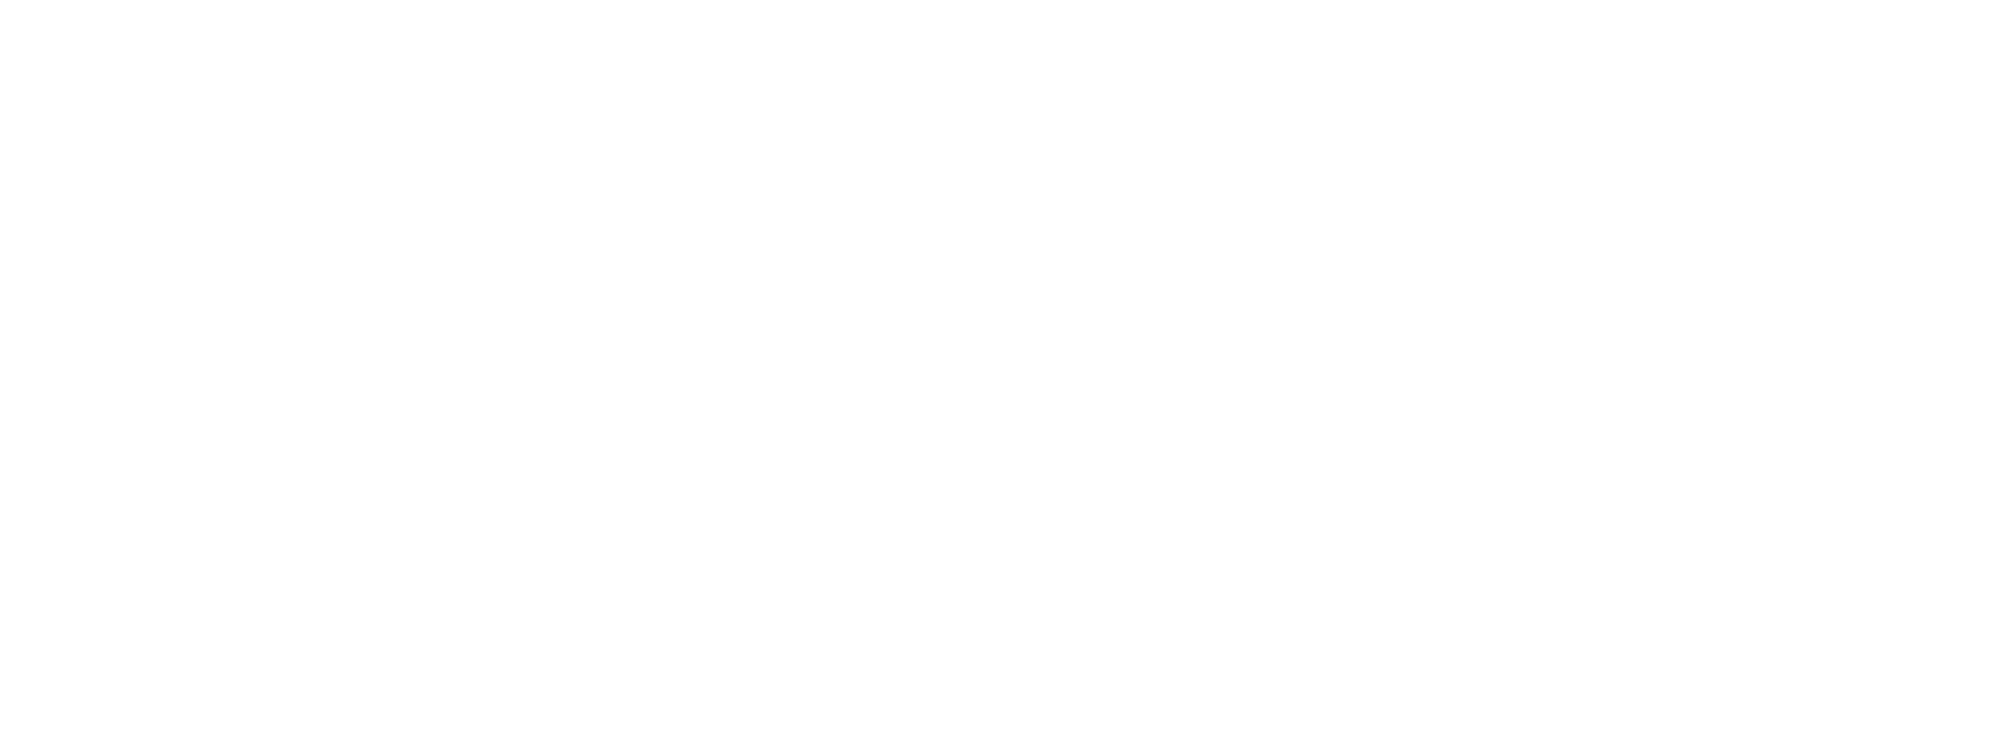

Correct classification Logistic         0.5 % of the data:  0.7866666666666666
Correct classification SVM              0.5 % of the data:  0.8266666666666667
Correct classification SVML             0.5 % of the data:  0.8
Correct classification SVMP deg3        0.5 % of the data:  0.7866666666666666
Correct classification SVMP deg2        0.5 % of the data:  0.7733333333333333
Correct classification SVMS             0.5 % of the data:  0.29333333333333333
Correct classification RFC              0.5 % of the data:  0.7333333333333333
Correct classification RFC etpy         0.5 % of the data:  0.7733333333333333
Correct classification KNN BT           0.5 % of the data:  0.8266666666666667
Correct classification KNN KD           0.5 % of the data:  0.8266666666666667
Correct classification KNN BRT          0.5 % of the data:  0.8133333333333334
Correct classification KNN BT wd=d      0.5 % of the data:  0.8266666666666667
Correct classification KNN KD wd=d      0.5 % of the data:  0.8266

In [73]:


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

n_classes = 3
    
fig, sub = plt.subplots(1, 2, figsize=(16,6))
sub[0].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')


particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)
    problr = logireg.predict_proba(x_v)
    print ("Correct classification Logistic        ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Creem el svm
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    probsvc = svc.predict_proba(x_v)
    print ("Correct classification SVM             ", part, "% of the data: ", svc.score(x_v, y_v))
    
    #Creem el svm lineal
    svcl = svm.SVC(C=10.0, kernel='linear', gamma=0.9, probability=True)

    # l'entrenem 
    svcl.fit(x_t, y_t)
    probsvcl = svcl.predict_proba(x_v)
    print ("Correct classification SVML            ", part, "% of the data: ", svcl.score(x_v, y_v))
    
    #Creem el svm poly deg=3
    svcp = svm.SVC(C=10.0, kernel='poly', gamma=0.9, probability=True)

    # l'entrenem 
    svcp.fit(x_t, y_t)
    probsvcp = svcp.predict_proba(x_v)
    print ("Correct classification SVMP deg3       ", part, "% of the data: ", svcp.score(x_v, y_v))
    
    #Creem el svm poly deg=2
    svcp2 = svm.SVC(C=10.0, kernel='poly', degree=2, gamma=0.9, probability=True)

    # l'entrenem 
    svcp2.fit(x_t, y_t)
    probsvcp2 = svcp2.predict_proba(x_v)
    print ("Correct classification SVMP deg2       ", part, "% of the data: ", svcp2.score(x_v, y_v))
    
   
    #Creem el svm sigmoid
    svcs= svm.SVC(C=10.0, kernel='sigmoid', gamma=0.9, probability=True)

    # l'entrenem 
    svcs.fit(x_t, y_t)
    probsvcs = svcs.predict_proba(x_v)
    print ("Correct classification SVMS            ", part, "% of the data: ", svcs.score(x_v, y_v))
    
    #####
    
    #random forests gini

    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(x_t, y_t)
    probclf = clf.predict_proba(x_v)
    print ("Correct classification RFC             ", part, "% of the data: ", clf.score(x_v, y_v))
    
    #random forests entropy with n_e=1000 and md=5

    clfe = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0,criterion="entropy")
    clfe.fit(x_t, y_t)
    probclfe = clfe.predict_proba(x_v)
    print ("Correct classification RFC etpy        ", part, "% of the data: ", clfe.score(x_v, y_v))

    #####
    
    #KNN ball_tree
    
    KNNbt = KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree")
    KNNbt.fit(x_t, y_t)
    probKNNbt = KNNbt.predict_proba(x_v)
    print ("Correct classification KNN BT          ", part, "% of the data: ", KNNbt.score(x_v, y_v))
    
    #KNN kd_tree
    
    KNNkd = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree")
    KNNkd.fit(x_t, y_t)
    probKNNkd = KNNkd.predict_proba(x_v)
    print ("Correct classification KNN KD          ", part, "% of the data: ", KNNkd.score(x_v, y_v))
    
    #KNN brute
    
    KNNbrt = KNeighborsClassifier(n_neighbors=3,algorithm="brute")
    KNNbrt.fit(x_t, y_t)
    probKNNbrt = KNNbrt.predict_proba(x_v)
    print ("Correct classification KNN BRT         ", part, "% of the data: ", KNNbrt.score(x_v, y_v))
    
    #####
    
    #KNN ball_tree weights = distance
    
    KNNbtwd = KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree",weights="distance")
    KNNbtwd.fit(x_t, y_t)
    probKNNbtwd = KNNbtwd.predict_proba(x_v)
    print ("Correct classification KNN BT wd=d     ", part, "% of the data: ", KNNbtwd.score(x_v, y_v))
    
    #KNN kd_tree weights = distance
    
    KNNkdwd = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree",weights="distance")
    KNNkdwd.fit(x_t, y_t)
    probKNNkdwd = KNNkdwd.predict_proba(x_v)
    print ("Correct classification KNN KD wd=d     ", part, "% of the data: ", KNNkdwd.score(x_v, y_v))
    
    #KNN brute weights = distance
    
    KNNbrtwd = KNeighborsClassifier(n_neighbors=3,algorithm="brute",weights="distance")
    KNNbrtwd.fit(x_t, y_t)
    probKNNbrtwd = KNNbrtwd.predict_proba(x_v)
    print ("Correct classification KNN BRT wd=d    ", part, "% of the data: ", KNNbrtwd.score(x_v, y_v))    
    
    print("\n")

Observem que les millors classificacions les fan el regressor logistic i el svm amb kernel lineal.

problr


<IPython.core.display.Javascript object>


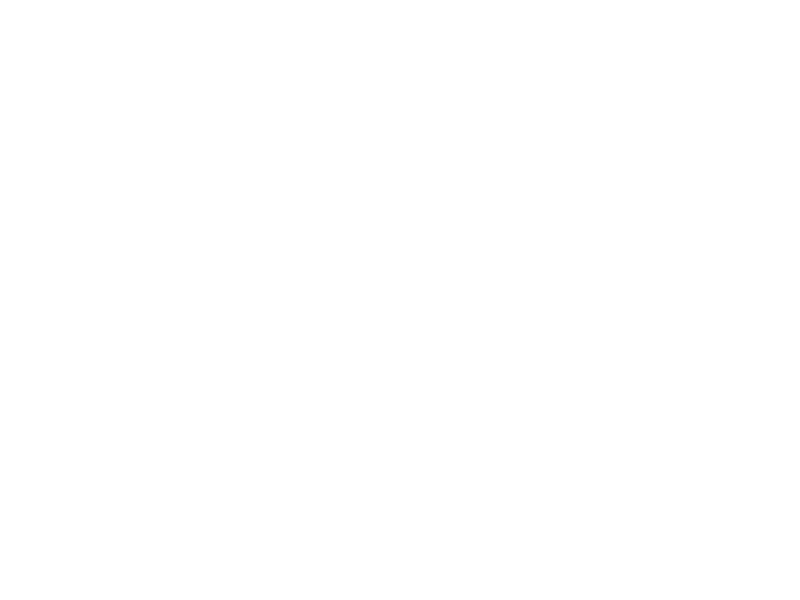

<IPython.core.display.Javascript object>


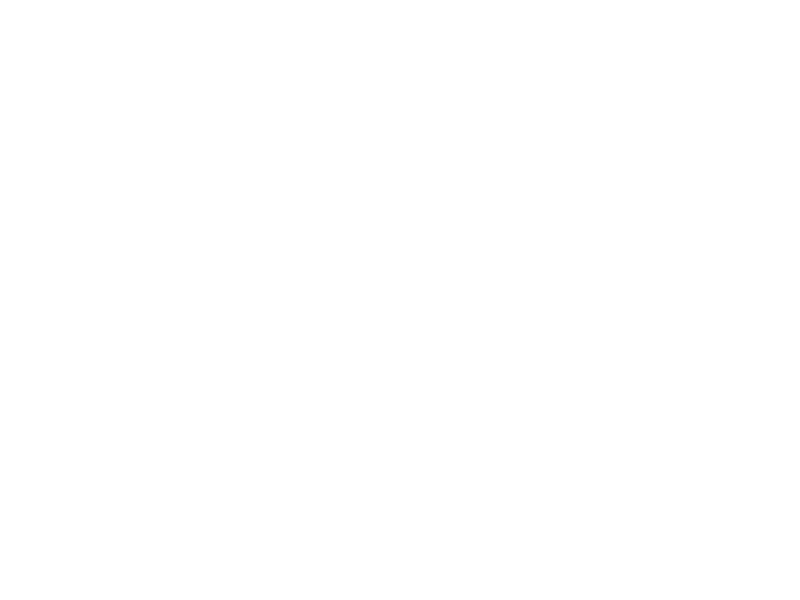

probsvc


<IPython.core.display.Javascript object>


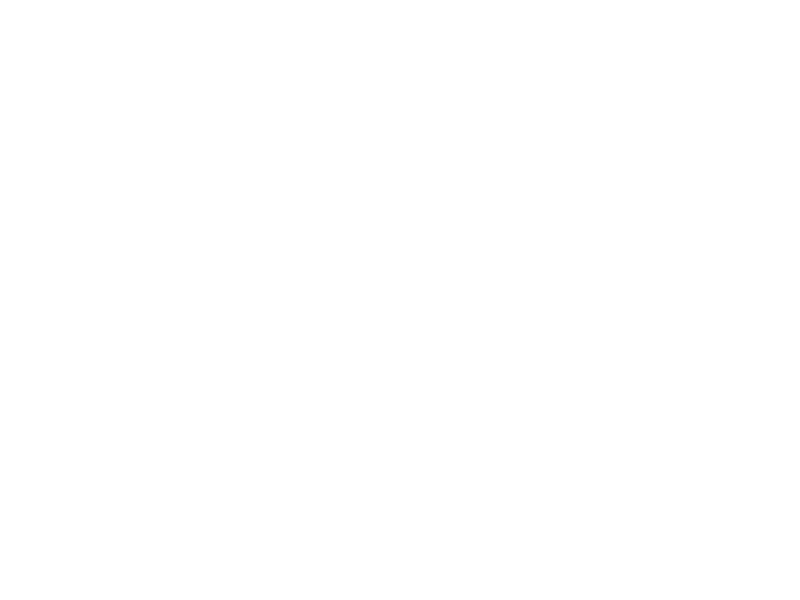

<IPython.core.display.Javascript object>


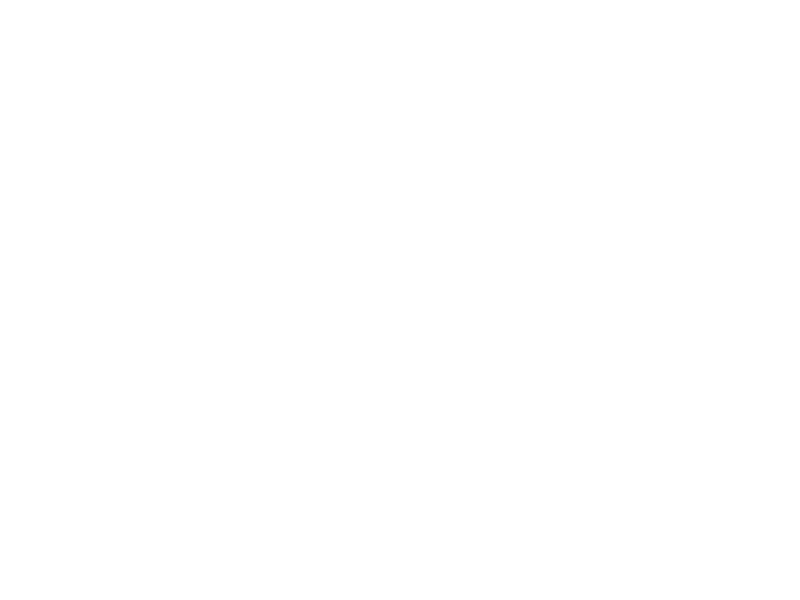

probsvcl


<IPython.core.display.Javascript object>


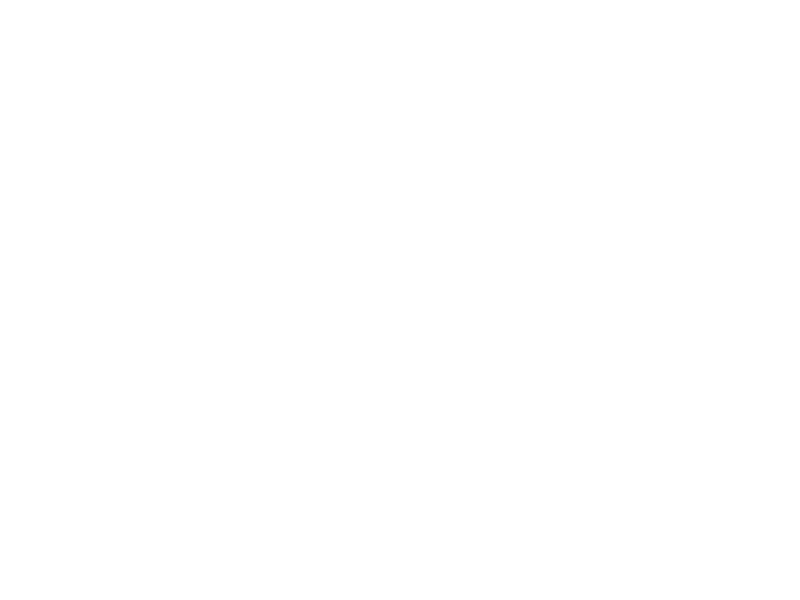

<IPython.core.display.Javascript object>


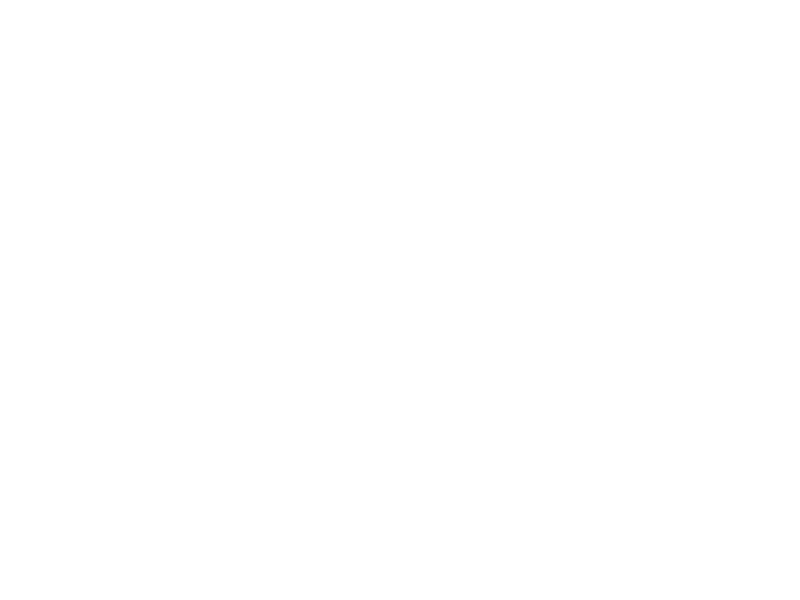

probsvcp


<IPython.core.display.Javascript object>


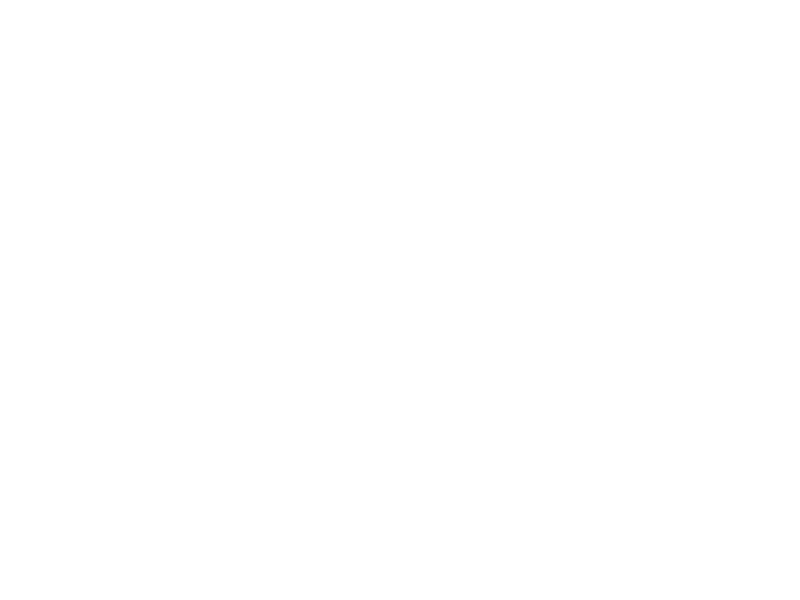

<IPython.core.display.Javascript object>


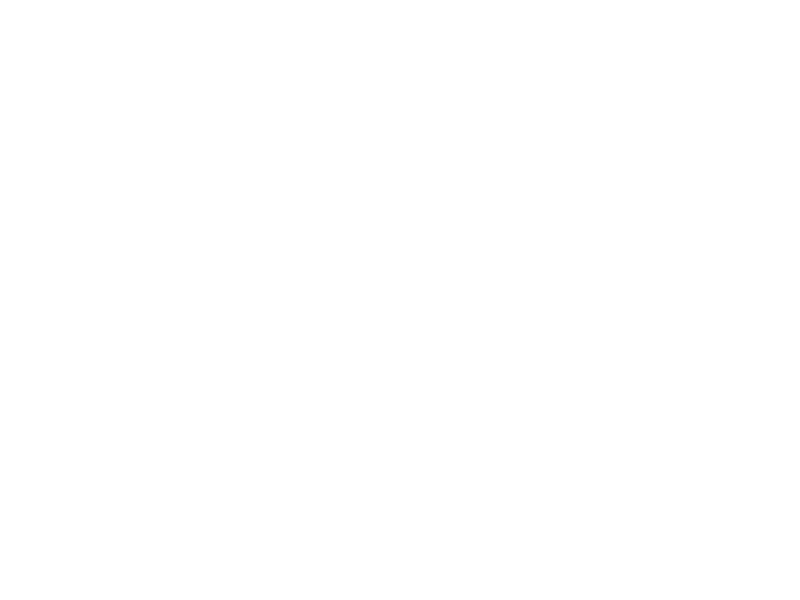

probsvcp2


<IPython.core.display.Javascript object>


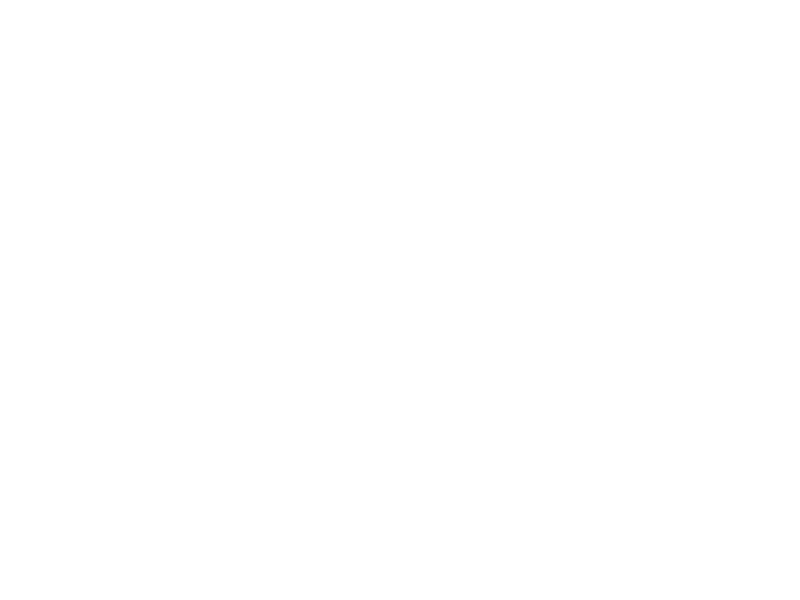

<IPython.core.display.Javascript object>


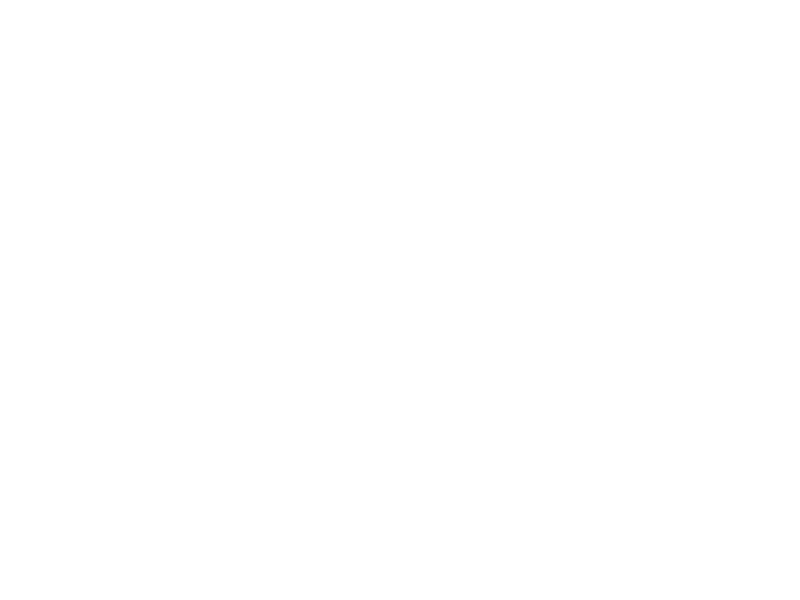

probsvcs


<IPython.core.display.Javascript object>


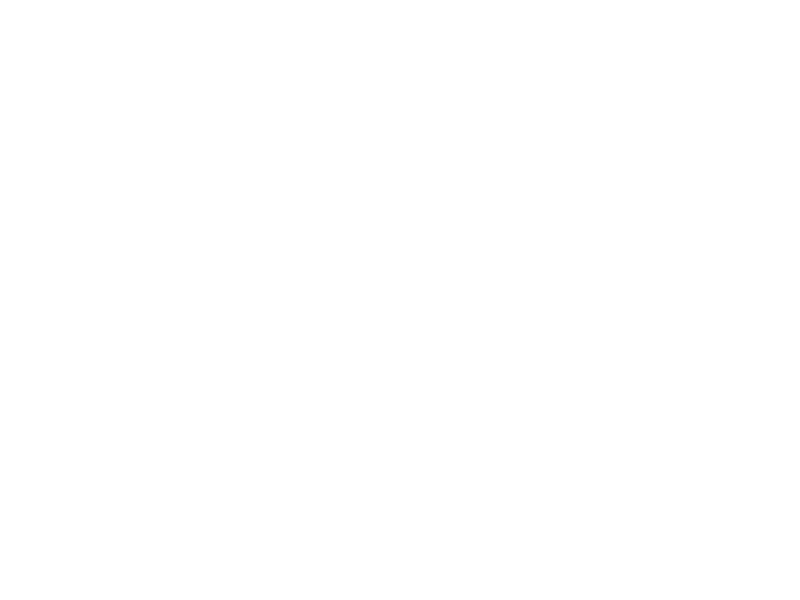

<IPython.core.display.Javascript object>


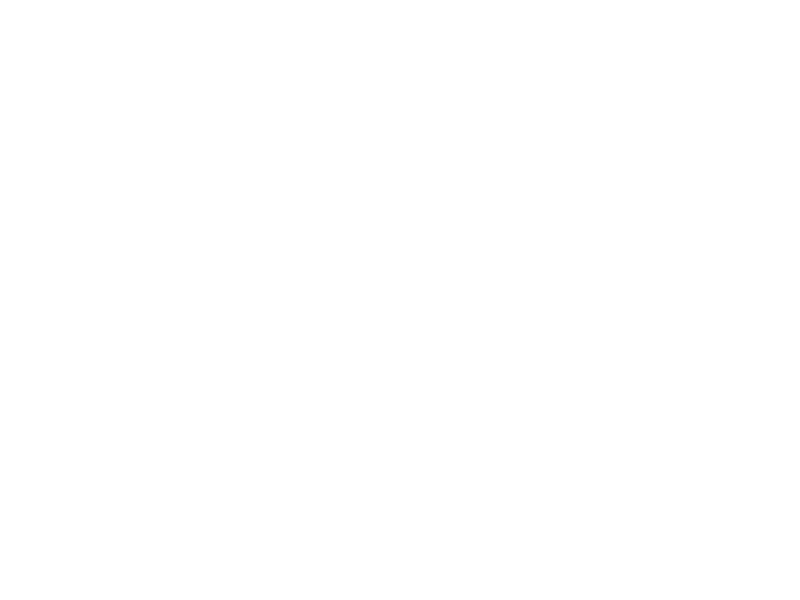

probclf


<IPython.core.display.Javascript object>


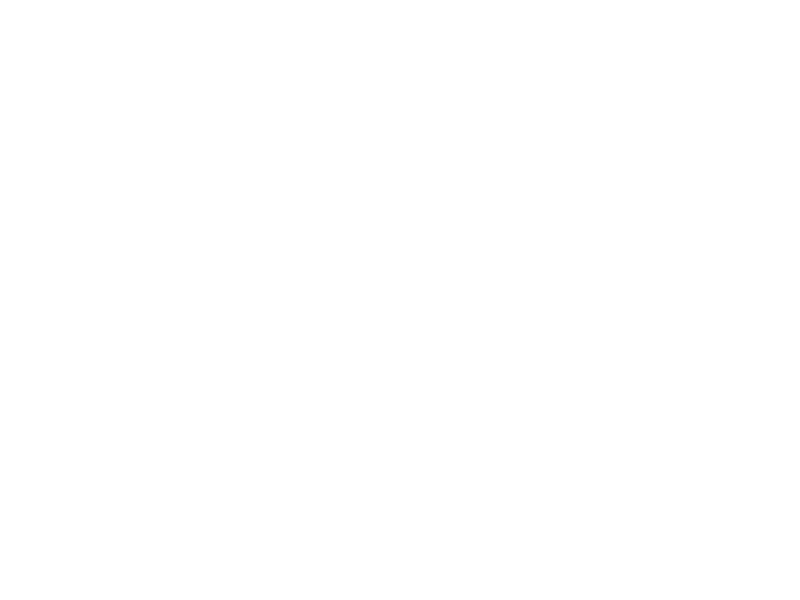

<IPython.core.display.Javascript object>


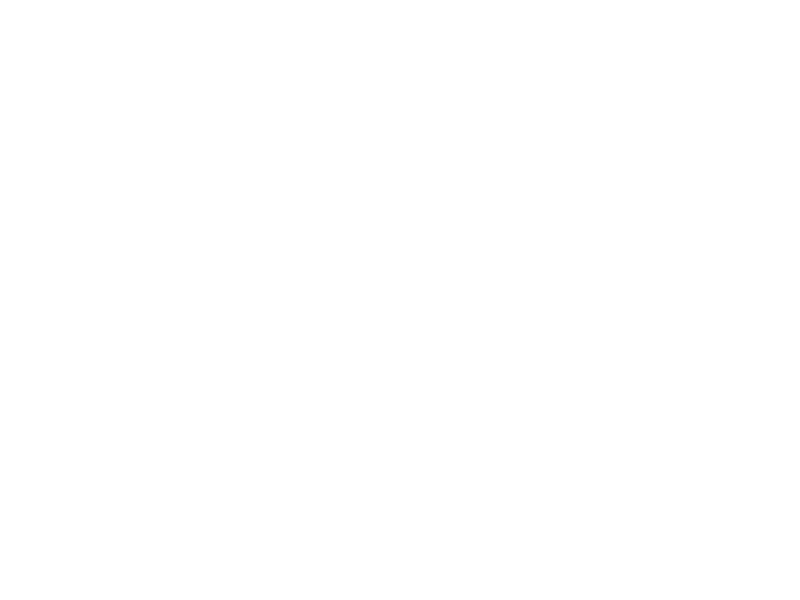

probclfe


<IPython.core.display.Javascript object>


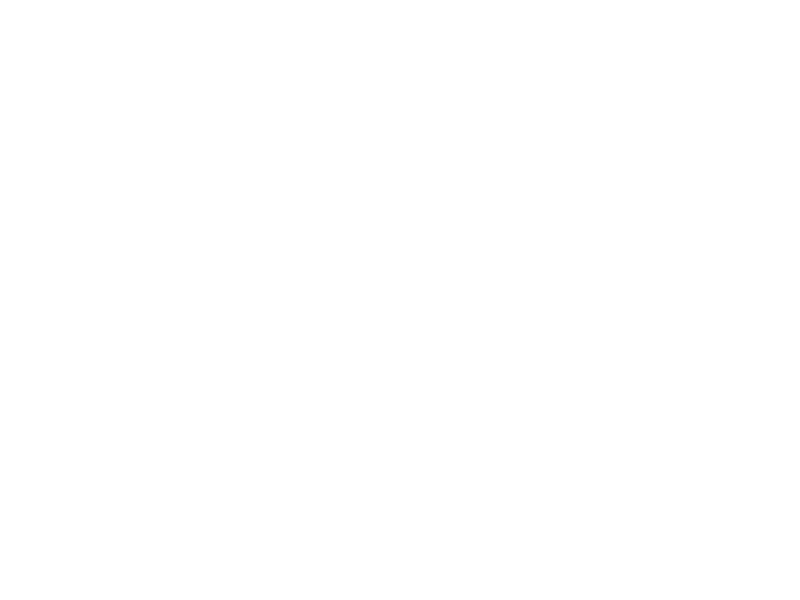

<IPython.core.display.Javascript object>


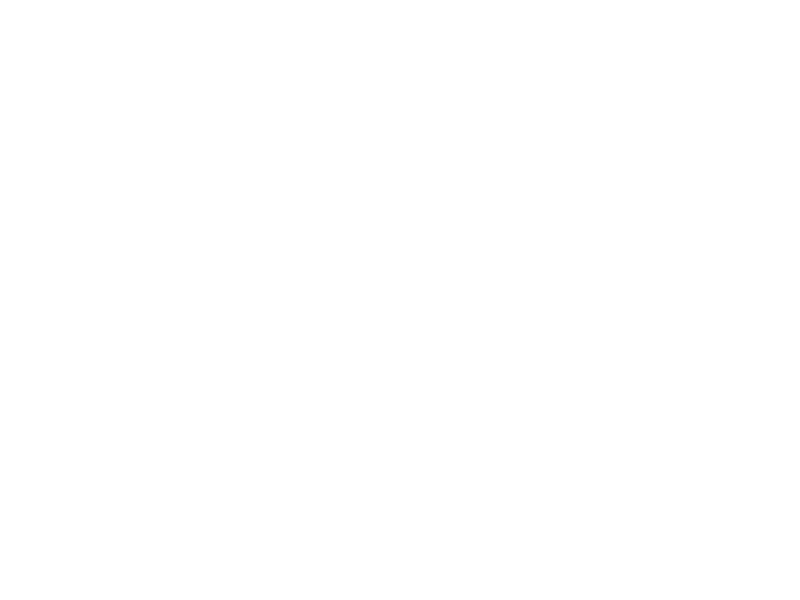

probKNNbt


<IPython.core.display.Javascript object>


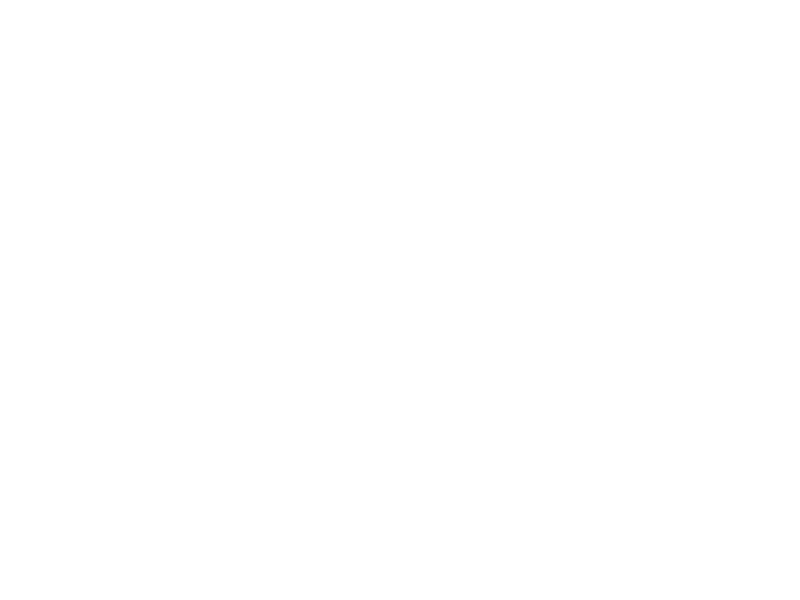

<IPython.core.display.Javascript object>


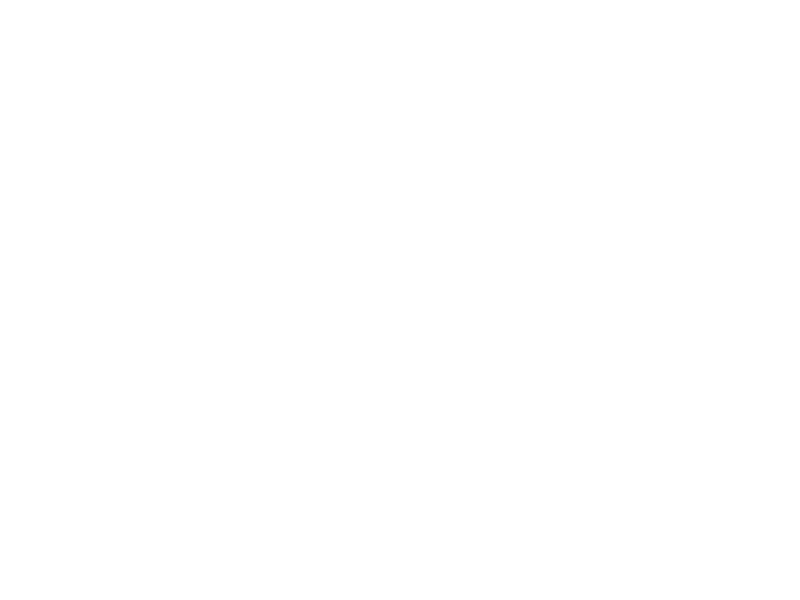

probKNNkd


<IPython.core.display.Javascript object>


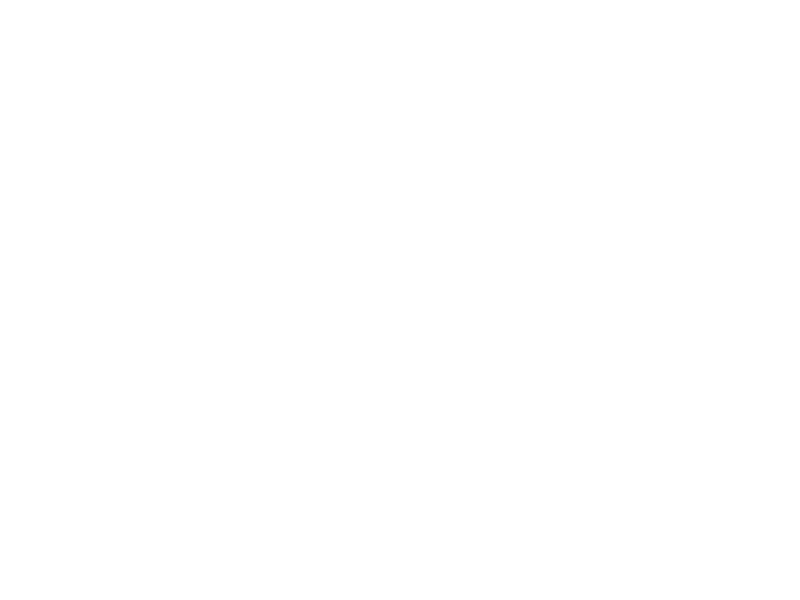

<IPython.core.display.Javascript object>


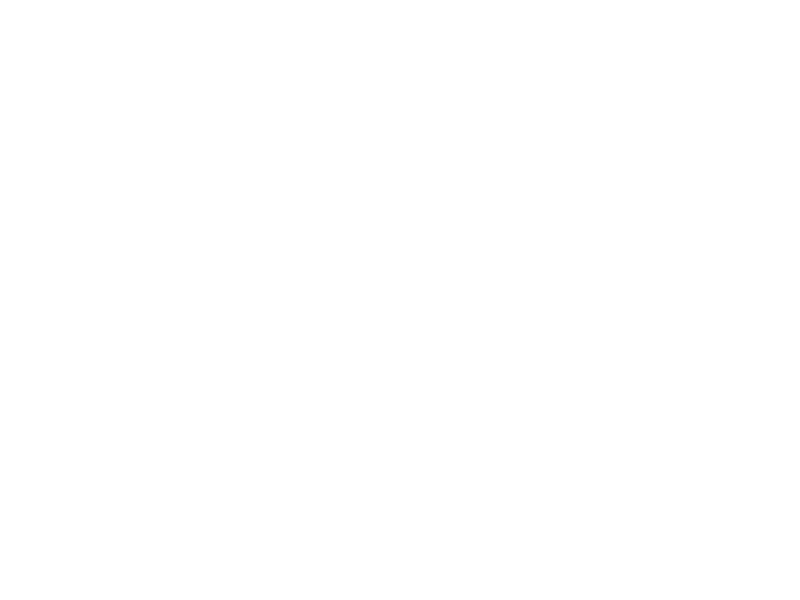

probKNNbrt


<IPython.core.display.Javascript object>


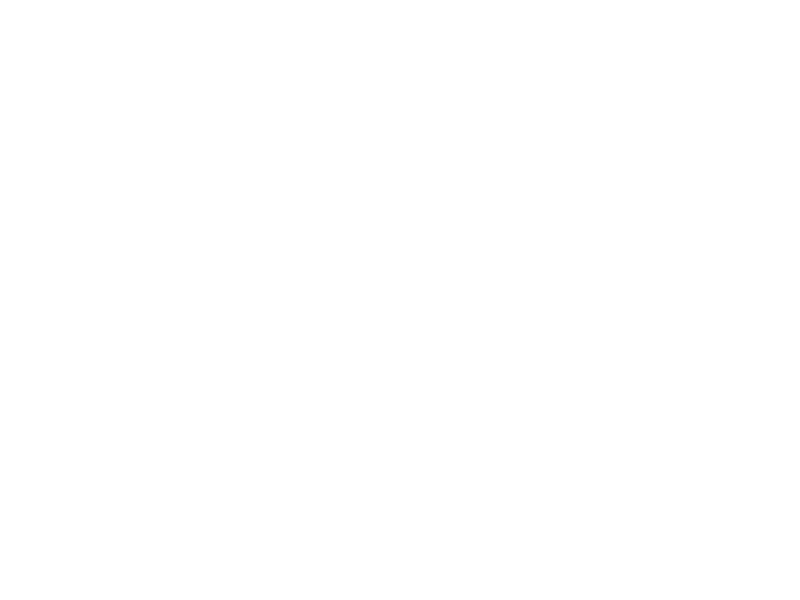

<IPython.core.display.Javascript object>


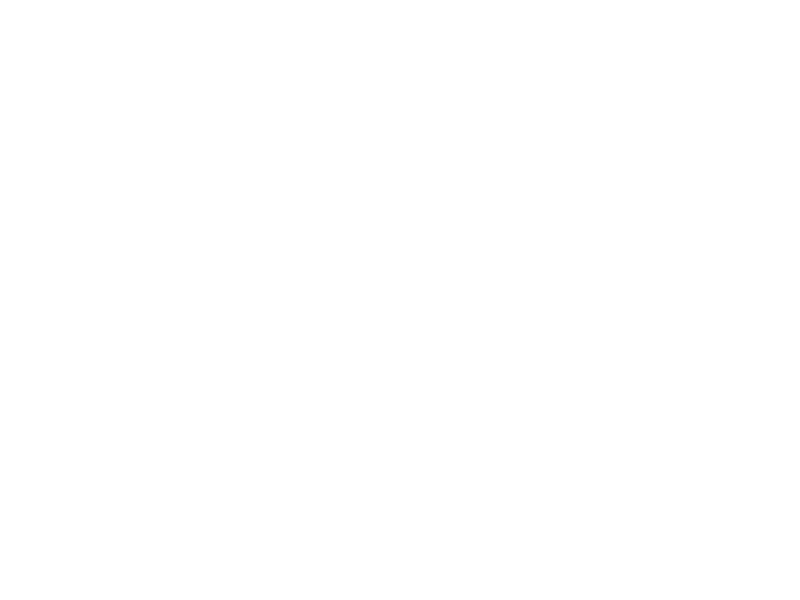

probKNNbtwd


<IPython.core.display.Javascript object>


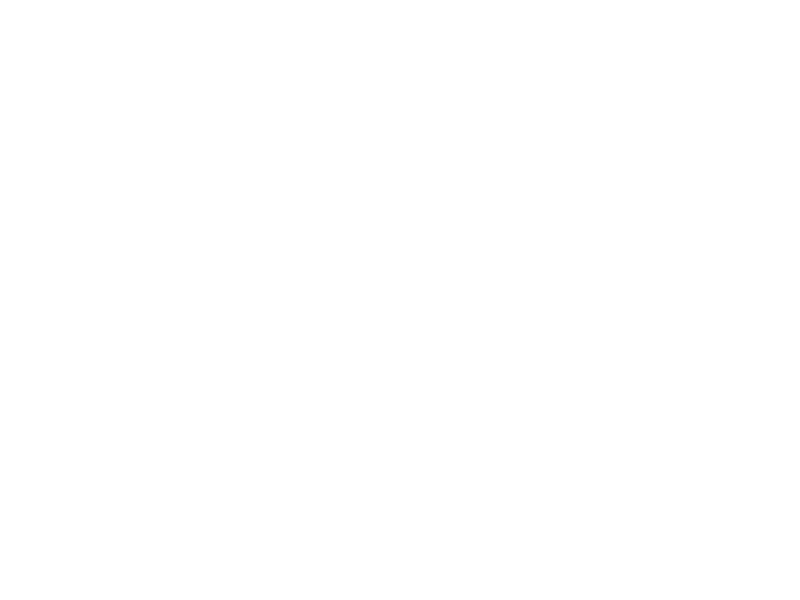

<IPython.core.display.Javascript object>


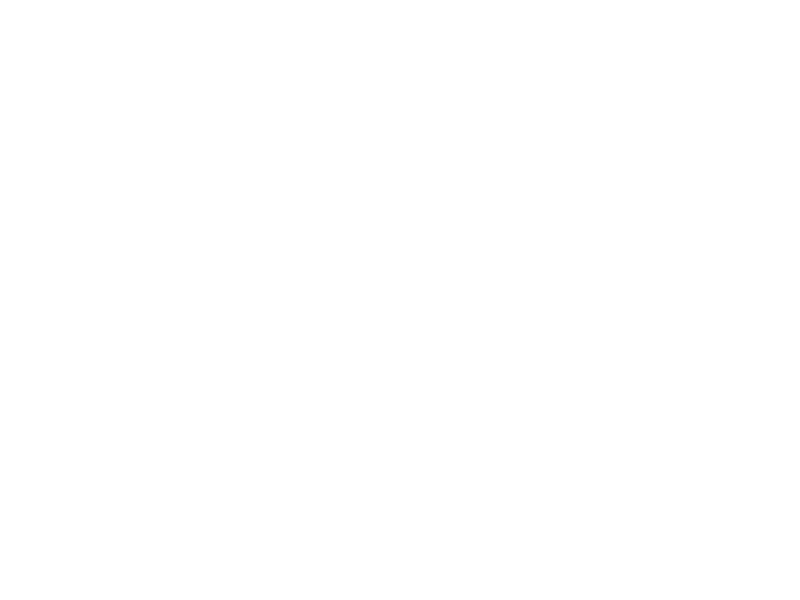

probKNNkdwd


<IPython.core.display.Javascript object>


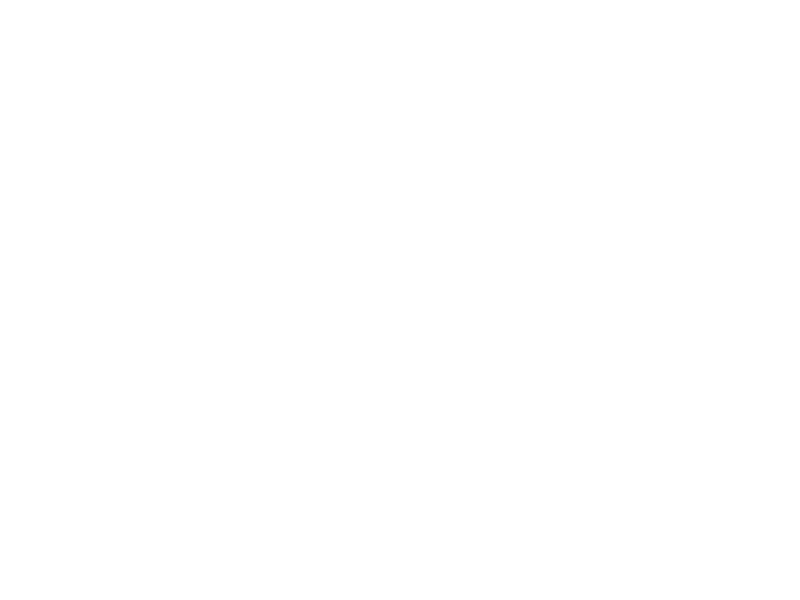

<IPython.core.display.Javascript object>


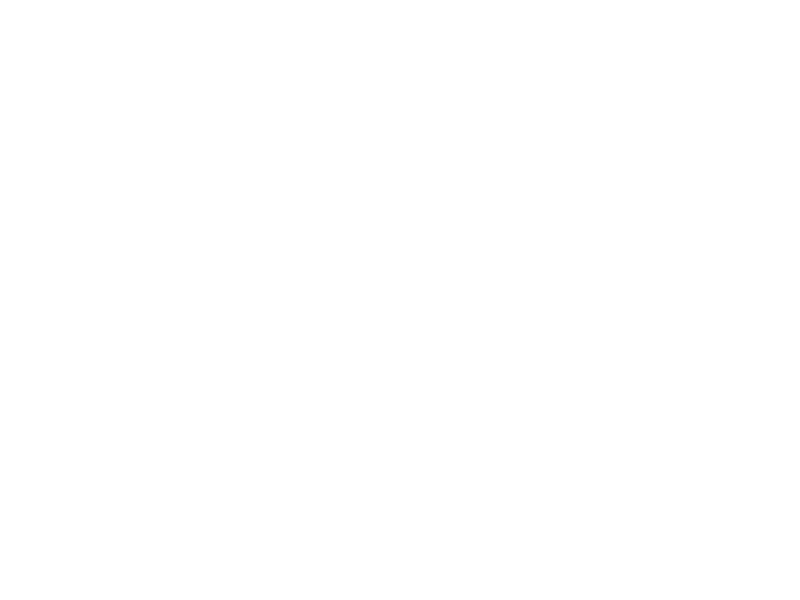

probKNNbrtwd


<IPython.core.display.Javascript object>


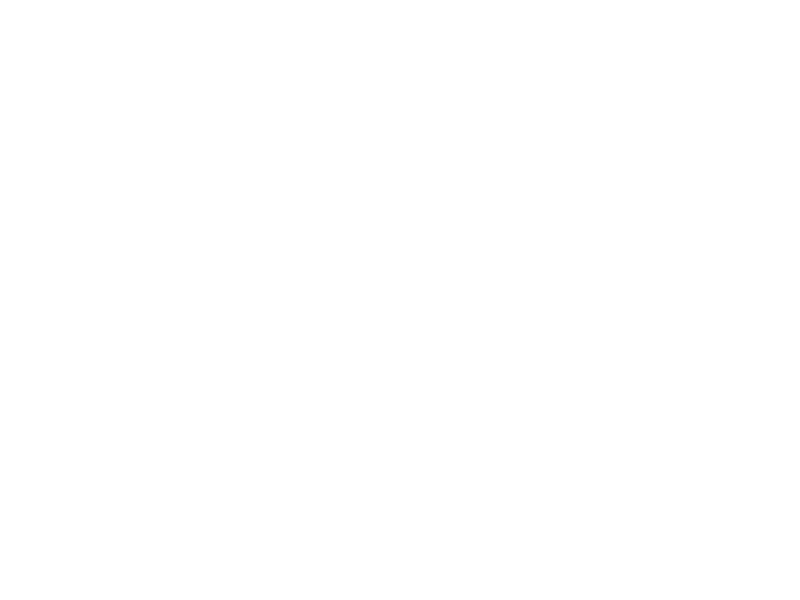

<IPython.core.display.Javascript object>


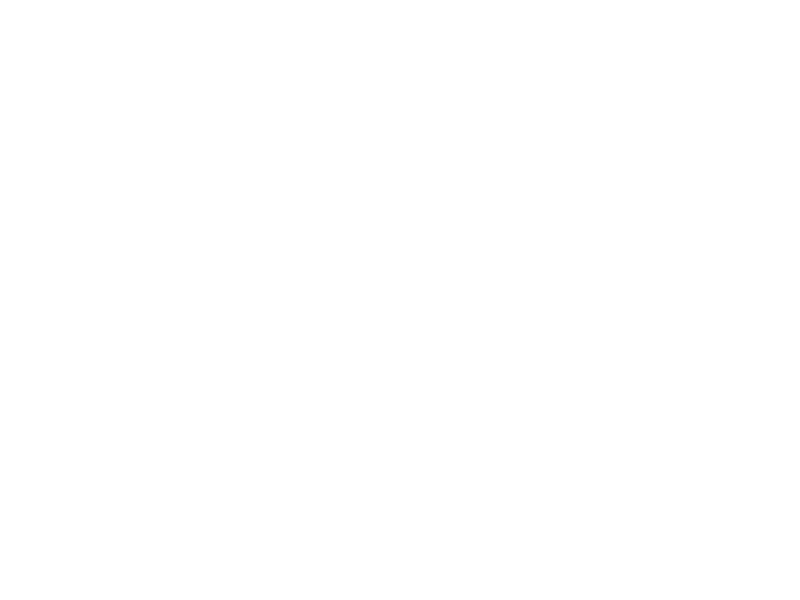

In [74]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc
def compute_precision_recall(probs):
    # Compute Precision-Recall and plot curve
    precision = {}
    recall = {}
    average_precision = {}
    plt.figure()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
        average_precision[i] = average_precision_score(y_v == i, probs[:, i])

        plt.plot(recall[i], precision[i],
        label='Precision-recall curve of class {0} (area = {1:0.2f})'
                               ''.format(i, average_precision[i]))
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc="upper right")

def compute_ROC(probs):
    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    # Plot ROC curve

    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
    plt.legend()

probs_list=[problr,probsvc,probsvcl,probsvcp,probsvcp2,probsvcs,probclf,probclfe,probKNNbt,probKNNkd,probKNNbrt,probKNNbtwd,probKNNkdwd,probKNNbrtwd]
probs_names=["problr","probsvc","probsvcl","probsvcp","probsvcp2","probsvcs","probclf","probclfe","probKNNbt","probKNNkd","probKNNbrt","probKNNbtwd","probKNNkdwd","probKNNbrtwd"]

for i in range (len(probs_list)):
    print(probs_names[i])
    compute_precision_recall(probs_list[i])
    compute_ROC(probs_list[i])


In [75]:
import numpy as np
import matplotlib.pyplot as plt


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(X,y,names,C=1.0, gamma=0.7, degree=3):

    # import some data to play with
    #iris = datasets.load_iris()
    # Take the first two features. We could avoid this by using a two-dim dataset
    X=X
    y=y
    names=names

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=1000000),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C))
    models = (clf.fit(X, y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(2, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel(names[0])
        ax.set_ylabel(names[1])
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()


<IPython.core.display.Javascript object>


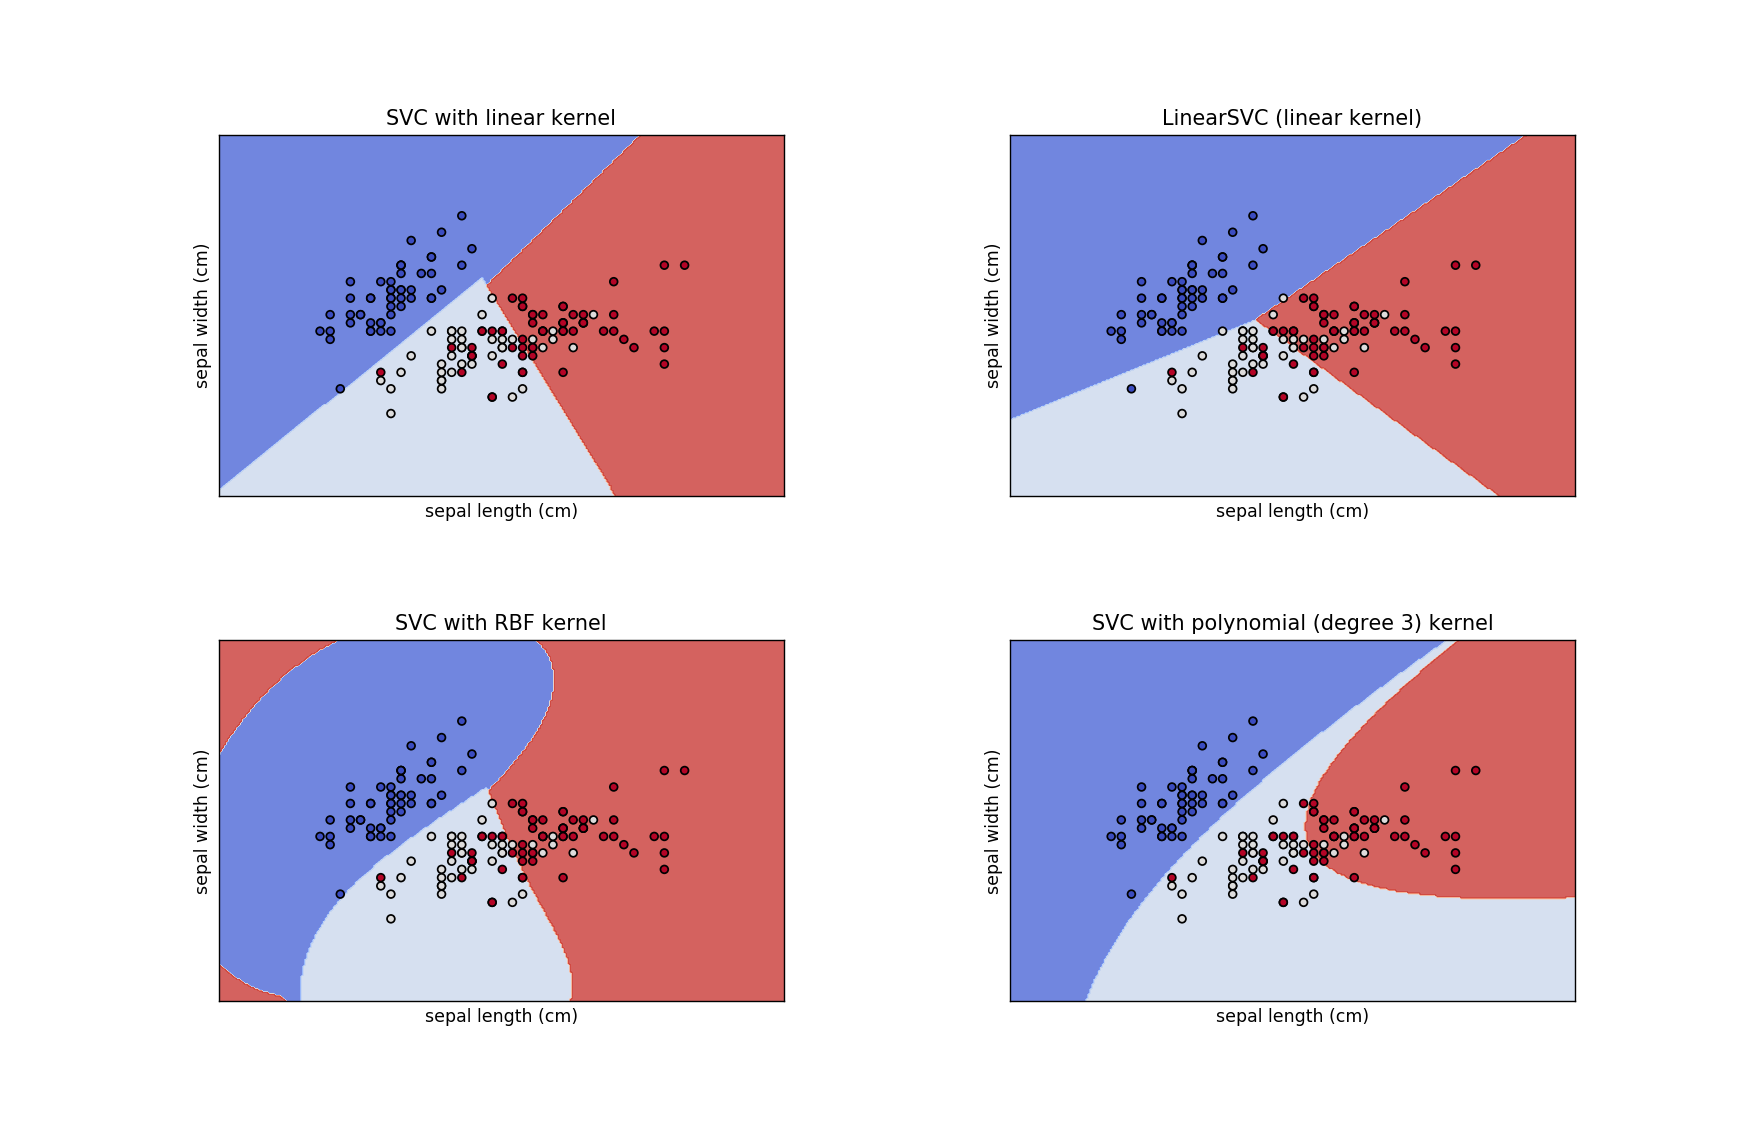

In [76]:
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
show_C_effect(X,y,iris.feature_names)

<IPython.core.display.Javascript object>


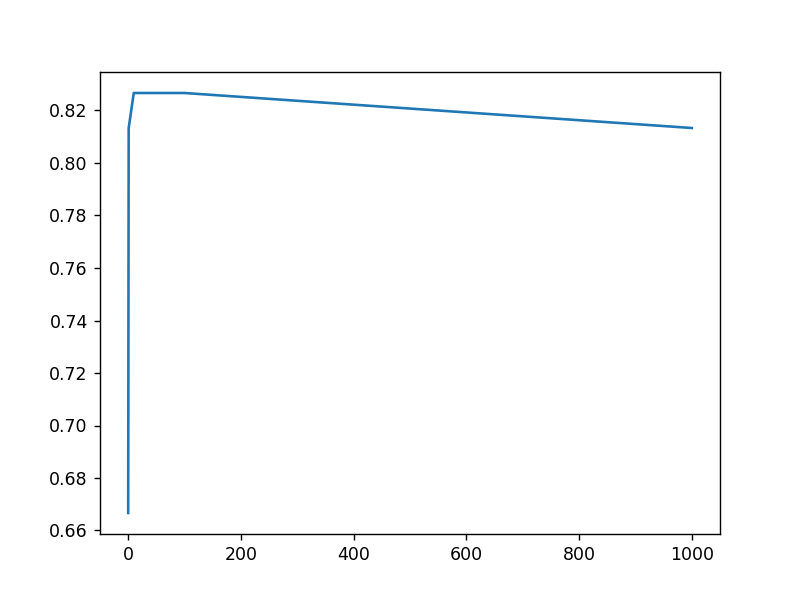

<IPython.core.display.Javascript object>


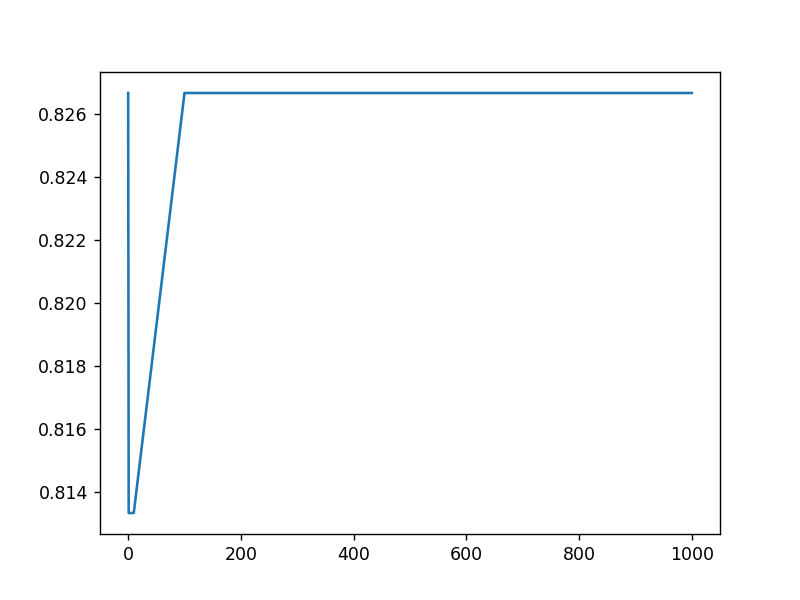

<IPython.core.display.Javascript object>


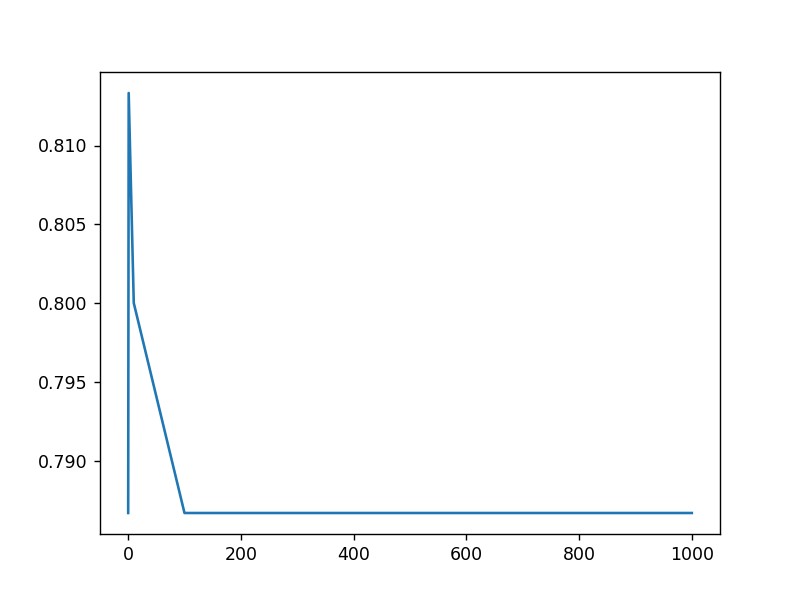

<IPython.core.display.Javascript object>


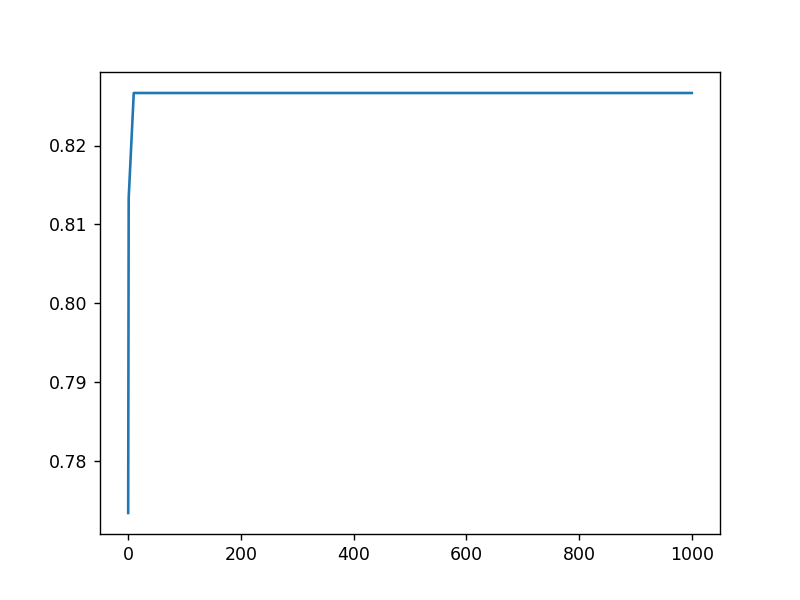

<IPython.core.display.Javascript object>


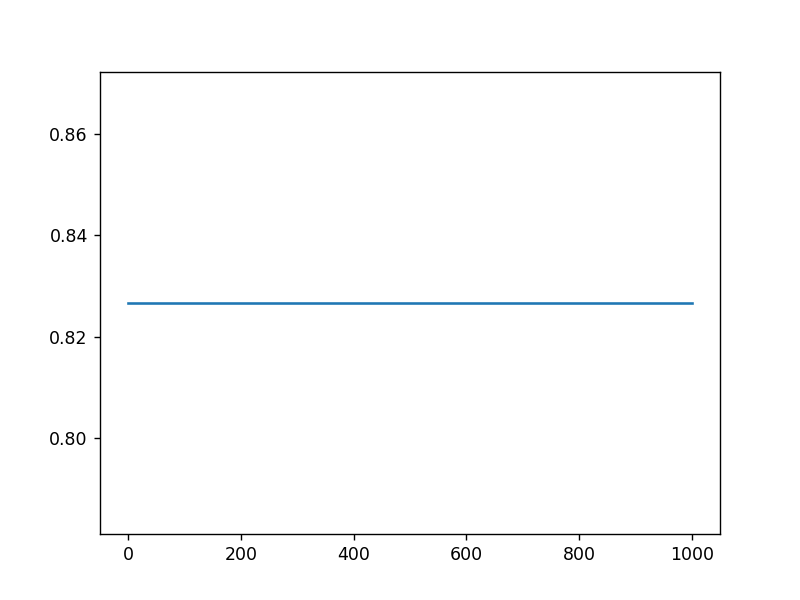

[0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667, 0.8266666666666667]


In [77]:
part=0.5
gamma=0.7
degree=3
CS=[0.1,1,10,100,1000]
x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
scores=[]
for C in CS:
    svc = LogisticRegression(C=C, fit_intercept=True, penalty='l2', tol=0.001)
    # l'entrenem 
    svc.fit(x_t, y_t)
    scores.append(svc.score(x_v,y_v))
plt.figure()
plt.plot(CS, scores)

scores=[]
for C in CS:
    svc = svm.SVC(kernel='linear', C=C)
    # l'entrenem 
    svc.fit(x_t, y_t)
    scores.append(svc.score(x_v,y_v))
plt.figure()
plt.plot(CS, scores)


scores=[]
for C in CS:
    svc = svm.LinearSVC(C=C, max_iter=1000000)
    # l'entrenem 
    svc.fit(x_t, y_t)
    scores.append(svc.score(x_v,y_v))
plt.figure()
plt.plot(CS, scores)

scores=[]
for C in CS:
    svc = svm.SVC(C=C, kernel='rbf', gamma=gamma)
    # l'entrenem 
    svc.fit(x_t, y_t)
    scores.append(svc.score(x_v,y_v))
plt.figure()
plt.plot(CS, scores)

scores=[]
for C in CS:
    svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C)
    svc.fit(x_t, y_t)
    scores.append(svc.score(x_v,y_v))
plt.figure()
plt.plot(CS, scores)
print(scores)


In [78]:
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',',decimal='.')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('pokemon1.csv')
data = dataset.values
dataset.isnull().sum() 

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m               0
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg              0
generation             0


In [79]:
dataset.iloc[773]

abilities            ['Shields Down']
against_bug                     0.500
against_dark                    1.000
against_dragon                  1.000
against_electric                2.000
against_fairy                   1.000
against_fight                   1.000
against_fire                    0.500
against_flying                  0.500
against_ghost                   1.000
against_grass                   1.000
against_ground                  0.000
against_ice                     2.000
against_normal                  0.500
against_poison                  0.500
against_psychic                 1.000
against_rock                    2.000
against_steel                   2.000
against_water                   2.000
attack                            100
base_egg_steps                   6400
base_happiness                     70
base_total                        500
capture_rate                       30
classfication          Meteor Pokémon
defense                            60
experience_g

In [80]:
dataset["type2"][dataset["type2"].isna()]=dataset["type1"][dataset["type2"].isna()]

In [81]:
len(dataset.columns)

41

In [82]:
dataset=dataset.drop(["name","japanese_name","pokedex_number","percentage_male","abilities","classfication"],axis=1)

In [83]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
label_encoder = sklearn.preprocessing.LabelEncoder() 
dataset['type1'] = label_encoder.fit_transform(dataset['type1'])
dataset['type2'] = label_encoder.fit_transform(dataset['type2'])

In [84]:
dataset['type2']

0      13
1      13
2      13
3       6
4       6
5       7
6      17
7      17
8      17
9       0
10      0
11      7
12     13
13     13
14     13
15      7
16      7
17      7
18      1
19      1
20      7
21      7
22     13
23     13
24      3
25      3
26     11
27     11
28     13
29     13
       ..
771    12
772    12
773     7
774    12
775     2
776    16
777     4
778    14
779     2
780     9
781     2
782     5
783     5
784     4
785     4
786     4
787     4
788    14
789    14
790    16
791     8
792    13
793     5
794     5
795     3
796     7
797    16
798     2
799    14
800     4
Name: type2, Length: 801, dtype: int32

In [85]:
correlacio = dataset.corr()
#plt.figure()
#ax = sns.heatmap(correlacio, annot=True, linewidths=.5)
#relacio = sns.pairplot(dataset)

In [86]:
correlacio["is_legendary"]

against_bug          0.028
against_dark         0.136
against_dragon       0.015
against_electric    -0.023
against_fairy        0.050
against_fight       -0.059
against_fire        -0.011
against_flying      -0.062
against_ghost        0.171
against_grass       -0.071
against_ground       0.013
against_ice          0.006
against_normal      -0.035
against_poison      -0.024
against_psychic     -0.106
against_rock        -0.018
against_steel        0.001
against_water       -0.021
attack               0.303
base_egg_steps       0.873
base_happiness      -0.413
base_total           0.485
capture_rate        -0.328
defense              0.266
experience_growth    0.361
height_m             0.318
hp                   0.308
sp_attack            0.406
sp_defense           0.343
speed                0.312
type1                0.018
type2               -0.000
weight_kg            0.387
generation           0.139
is_legendary         1.000
Name: is_legendary, dtype: float64

In [87]:
y = dataset.filter(['is_legendary'])
X =dataset.drop(['is_legendary'],axis=1)
X=(X-X.mean())/X.std()

In [88]:
X.columns

Index(['against_bug', 'against_dark', 'against_dragon', 'against_electric',
       'against_fairy', 'against_fight', 'against_fire', 'against_flying',
       'against_ghost', 'against_grass', 'against_ground', 'against_ice',
       'against_normal', 'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'defense',
       'experience_growth', 'height_m', 'hp', 'sp_attack', 'sp_defense',
       'speed', 'type1', 'type2', 'weight_kg', 'generation'],
      dtype='object')

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.2,random_state =42)
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(X_train, np.ravel(Y_train.values,order='C'))
sel_.get_support()
X_train = pd.DataFrame(X_train)
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

total features: 34
selected features: 18
features with coefficients shrank to zero: 16


In [15]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)
X_train.shape, X_test.shape

((640, 18), (161, 18))

In [16]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l2', solver='liblinear'))
sel_.fit(X_train, np.ravel(Y_train,order='C'))
sel_.get_support()
X_train = pd.DataFrame(X_train)
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print(selected_feat)
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_.estimator_.coef_ == 0)))

total features: 18
selected features: 6
Int64Index([0, 3, 7, 9, 10, 11], dtype='int64')
features with coefficients shrank to zero: 0


In [89]:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
print(removed_feats)
X_train_selected = sel_.transform(X_train)
X_test_selected = sel_.transform(X_test)
X_train_selected.shape, X_test_selected.shape

Int64Index([], dtype='int64')


((640, 6), (161, 6))

In [18]:
x_t=X_train_selected
x_v=X_test_selected
y_t=Y_train
y_v=Y_test

particions = [0.5, 0.7, 0.8]

for part in particions:
    #x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)
    problr = logireg.predict_proba(x_v)
    print ("Correct classification Logistic        ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Creem el svm
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    probsvc = svc.predict_proba(x_v)
    print ("Correct classification SVM             ", part, "% of the data: ", svc.score(x_v, y_v))
    
    #Creem el svm lineal
    svcl = svm.SVC(C=10.0, kernel='linear', gamma=0.9, probability=True)

    # l'entrenem 
    svcl.fit(x_t, y_t)
    probsvcl = svcl.predict_proba(x_v)
    print ("Correct classification SVML            ", part, "% of the data: ", svcl.score(x_v, y_v))
    
    #Creem el svm poly deg=3
    svcp = svm.SVC(C=10.0, kernel='poly', gamma=0.9, probability=True)

    # l'entrenem 
    svcp.fit(x_t, y_t)
    probsvcp = svcp.predict_proba(x_v)
    print ("Correct classification SVMP deg3       ", part, "% of the data: ", svcp.score(x_v, y_v))
    
    #Creem el svm poly deg=2
    svcp2 = svm.SVC(C=10.0, kernel='poly', degree=2, gamma=0.9, probability=True)

    # l'entrenem 
    svcp2.fit(x_t, y_t)
    probsvcp2 = svcp2.predict_proba(x_v)
    print ("Correct classification SVMP deg2       ", part, "% of the data: ", svcp2.score(x_v, y_v))
    
   
    #Creem el svm sigmoid
    svcs= svm.SVC(C=10.0, kernel='sigmoid', gamma=0.9, probability=True)

    # l'entrenem 
    svcs.fit(x_t, y_t)
    probsvcs = svcs.predict_proba(x_v)
    print ("Correct classification SVMS            ", part, "% of the data: ", svcs.score(x_v, y_v))
    
    #####
    
    #random forests gini

    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(x_t, y_t)
    probclf = clf.predict_proba(x_v)
    print ("Correct classification RFC             ", part, "% of the data: ", clf.score(x_v, y_v))
    
    #random forests entropy with n_e=1000 and md=5

    clfe = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0,criterion="entropy")
    clfe.fit(x_t, y_t)
    probclfe = clfe.predict_proba(x_v)
    print ("Correct classification RFC etpy        ", part, "% of the data: ", clfe.score(x_v, y_v))

    #####
    
    #KNN ball_tree
    
    KNNbt = KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree")
    KNNbt.fit(x_t, y_t)
    probKNNbt = KNNbt.predict_proba(x_v)
    print ("Correct classification KNN BT          ", part, "% of the data: ", KNNbt.score(x_v, y_v))
    
    #KNN kd_tree
    
    KNNkd = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree")
    KNNkd.fit(x_t, y_t)
    probKNNkd = KNNkd.predict_proba(x_v)
    print ("Correct classification KNN KD          ", part, "% of the data: ", KNNkd.score(x_v, y_v))
    
    #KNN brute
    
    KNNbrt = KNeighborsClassifier(n_neighbors=3,algorithm="brute")
    KNNbrt.fit(x_t, y_t)
    probKNNbrt = KNNbrt.predict_proba(x_v)
    print ("Correct classification KNN BRT         ", part, "% of the data: ", KNNbrt.score(x_v, y_v))
    
    #####
    
    #KNN ball_tree weights = distance
    
    KNNbtwd = KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree",weights="distance")
    KNNbtwd.fit(x_t, y_t)
    probKNNbtwd = KNNbtwd.predict_proba(x_v)
    print ("Correct classification KNN BT wd=d     ", part, "% of the data: ", KNNbtwd.score(x_v, y_v))
    
    #KNN kd_tree weights = distance
    
    KNNkdwd = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree",weights="distance")
    KNNkdwd.fit(x_t, y_t)
    probKNNkdwd = KNNkdwd.predict_proba(x_v)
    print ("Correct classification KNN KD wd=d     ", part, "% of the data: ", KNNkdwd.score(x_v, y_v))
    
    #KNN brute weights = distance
    
    KNNbrtwd = KNeighborsClassifier(n_neighbors=3,algorithm="brute",weights="distance")
    KNNbrtwd.fit(x_t, y_t)
    probKNNbrtwd = KNNbrtwd.predict_proba(x_v)
    print ("Correct classification KNN BRT wd=d    ", part, "% of the data: ", KNNbrtwd.score(x_v, y_v))    
    
    print("\n")

Correct classification Logistic         0.5 % of the data:  0.9875776397515528
Correct classification SVM              0.5 % of the data:  0.9875776397515528
Correct classification SVML             0.5 % of the data:  0.9813664596273292
Correct classification SVMP deg3        0.5 % of the data:  1.0
Correct classification SVMP deg2        0.5 % of the data:  0.9937888198757764
Correct classification SVMS             0.5 % of the data:  0.84472049689441
Correct classification RFC              0.5 % of the data:  1.0
Correct classification RFC etpy         0.5 % of the data:  1.0
Correct classification KNN BT           0.5 % of the data:  0.9875776397515528
Correct classification KNN KD           0.5 % of the data:  0.9875776397515528
Correct classification KNN BRT          0.5 % of the data:  0.9875776397515528
Correct classification KNN BT wd=d      0.5 % of the data:  1.0
Correct classification KNN KD wd=d      0.5 % of the data:  1.0
Correct classification KNN BRT wd=d     0.5 % of t

In [90]:
dataset_x = dataset.drop(columns='is_legendary')
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(dataset_x)
pca = PCA(n_components = 2)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)
df = pd.DataFrame(reduced, columns = ['pc1','pc2'])
df['is_legendary']=dataset['is_legendary']
df.head()

,pc1,pc2,is_legendary
0,-0.212,-0.123,0
1,-0.110,-0.009,0
2,0.168,0.283,0
3,-0.205,-0.061,0
4,-0.092,0.065,0


<IPython.core.display.Javascript object>


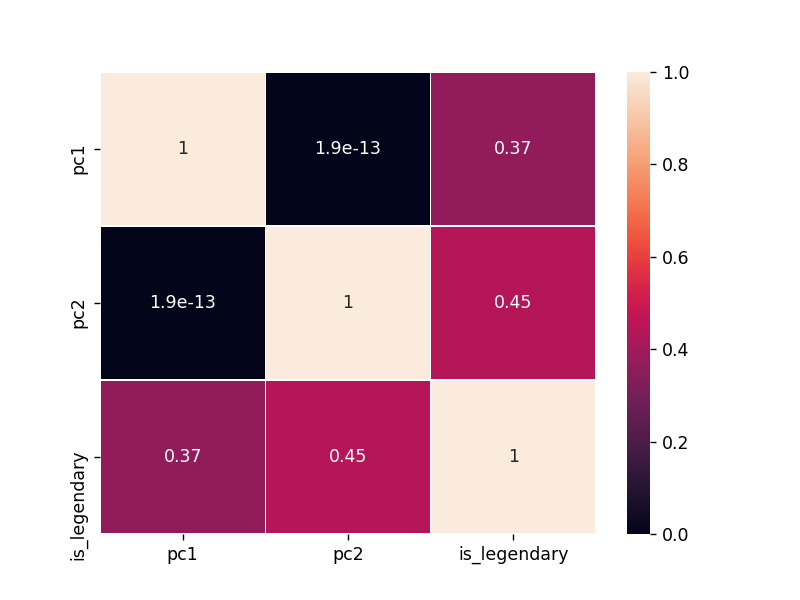

In [91]:
correlacio =df.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, linewidths=.25)
plt.show()

In [67]:
X=df.drop(["is_legendary"],axis=1)
y=df.filter(["is_legendary"])
x_t,x_v,t_t,t_v = train_test_split(X, y, test_size=0.2)
#x_t=X_train_selected
#x_v=X_test_selected
#y_t=Y_train
#y_v=Y_test

particions = [0.5, 0.7, 0.8]

for part in particions:
    #x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)
    problr = logireg.predict_proba(x_v)
    print ("Correct classification Logistic        ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Creem el svm
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    probsvc = svc.predict_proba(x_v)
    print ("Correct classification SVM             ", part, "% of the data: ", svc.score(x_v, y_v))
    
    #Creem el svm lineal
    svcl = svm.SVC(C=10.0, kernel='linear', gamma=0.9, probability=True)

    # l'entrenem 
    svcl.fit(x_t, y_t)
    probsvcl = svcl.predict_proba(x_v)
    print ("Correct classification SVML            ", part, "% of the data: ", svcl.score(x_v, y_v))
    
    #Creem el svm poly deg=3
    svcp = svm.SVC(C=10.0, kernel='poly', gamma=0.9, probability=True)

    # l'entrenem 
    svcp.fit(x_t, y_t)
    probsvcp = svcp.predict_proba(x_v)
    print ("Correct classification SVMP deg3       ", part, "% of the data: ", svcp.score(x_v, y_v))
    
    #Creem el svm poly deg=2
    svcp2 = svm.SVC(C=10.0, kernel='poly', degree=2, gamma=0.9, probability=True)

    # l'entrenem 
    svcp2.fit(x_t, y_t)
    probsvcp2 = svcp2.predict_proba(x_v)
    print ("Correct classification SVMP deg2       ", part, "% of the data: ", svcp2.score(x_v, y_v))
    
   
    #Creem el svm sigmoid
    svcs= svm.SVC(C=10.0, kernel='sigmoid', gamma=0.9, probability=True)

    # l'entrenem 
    svcs.fit(x_t, y_t)
    probsvcs = svcs.predict_proba(x_v)
    print ("Correct classification SVMS            ", part, "% of the data: ", svcs.score(x_v, y_v))
    
    #####
    
    #random forests gini

    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(x_t, y_t)
    probclf = clf.predict_proba(x_v)
    print ("Correct classification RFC             ", part, "% of the data: ", clf.score(x_v, y_v))
    
    #random forests entropy with n_e=1000 and md=5

    clfe = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0,criterion="entropy")
    clfe.fit(x_t, y_t)
    probclfe = clfe.predict_proba(x_v)
    print ("Correct classification RFC etpy        ", part, "% of the data: ", clfe.score(x_v, y_v))

    #####
    
    #KNN ball_tree
    
    KNNbt = KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree")
    KNNbt.fit(x_t, y_t)
    probKNNbt = KNNbt.predict_proba(x_v)
    print ("Correct classification KNN BT          ", part, "% of the data: ", KNNbt.score(x_v, y_v))
    
    #KNN kd_tree
    
    KNNkd = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree")
    KNNkd.fit(x_t, y_t)
    probKNNkd = KNNkd.predict_proba(x_v)
    print ("Correct classification KNN KD          ", part, "% of the data: ", KNNkd.score(x_v, y_v))
    
    #KNN brute
    
    KNNbrt = KNeighborsClassifier(n_neighbors=3,algorithm="brute")
    KNNbrt.fit(x_t, y_t)
    probKNNbrt = KNNbrt.predict_proba(x_v)
    print ("Correct classification KNN BRT         ", part, "% of the data: ", KNNbrt.score(x_v, y_v))
    
    #####
    
    #KNN ball_tree weights = distance
    
    KNNbtwd = KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree",weights="distance")
    KNNbtwd.fit(x_t, y_t)
    probKNNbtwd = KNNbtwd.predict_proba(x_v)
    print ("Correct classification KNN BT wd=d     ", part, "% of the data: ", KNNbtwd.score(x_v, y_v))
    
    #KNN kd_tree weights = distance
    
    KNNkdwd = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree",weights="distance")
    KNNkdwd.fit(x_t, y_t)
    probKNNkdwd = KNNkdwd.predict_proba(x_v)
    print ("Correct classification KNN KD wd=d     ", part, "% of the data: ", KNNkdwd.score(x_v, y_v))
    
    #KNN brute weights = distance
    
    KNNbrtwd = KNeighborsClassifier(n_neighbors=3,algorithm="brute",weights="distance")
    KNNbrtwd.fit(x_t, y_t)
    probKNNbrtwd = KNNbrtwd.predict_proba(x_v)
    print ("Correct classification KNN BRT wd=d    ", part, "% of the data: ", KNNbrtwd.score(x_v, y_v))    
    
    print("\n")

Correct classification Logistic         0.5 % of the data:  0.8881987577639752
Correct classification SVM              0.5 % of the data:  0.8881987577639752
Correct classification SVML             0.5 % of the data:  0.8881987577639752
Correct classification SVMP deg3        0.5 % of the data:  0.8881987577639752
Correct classification SVMP deg2        0.5 % of the data:  0.8881987577639752
Correct classification SVMS             0.5 % of the data:  0.8136645962732919
Correct classification RFC              0.5 % of the data:  0.8881987577639752
Correct classification RFC etpy         0.5 % of the data:  0.8881987577639752
Correct classification KNN BT           0.5 % of the data:  0.8881987577639752
Correct classification KNN KD           0.5 % of the data:  0.8881987577639752
Correct classification KNN BRT          0.5 % of the data:  0.8881987577639752
Correct classification KNN BT wd=d      0.5 % of the data:  0.8695652173913043
Correct classification KNN KD wd=d      0.5 % of the

<IPython.core.display.Javascript object>


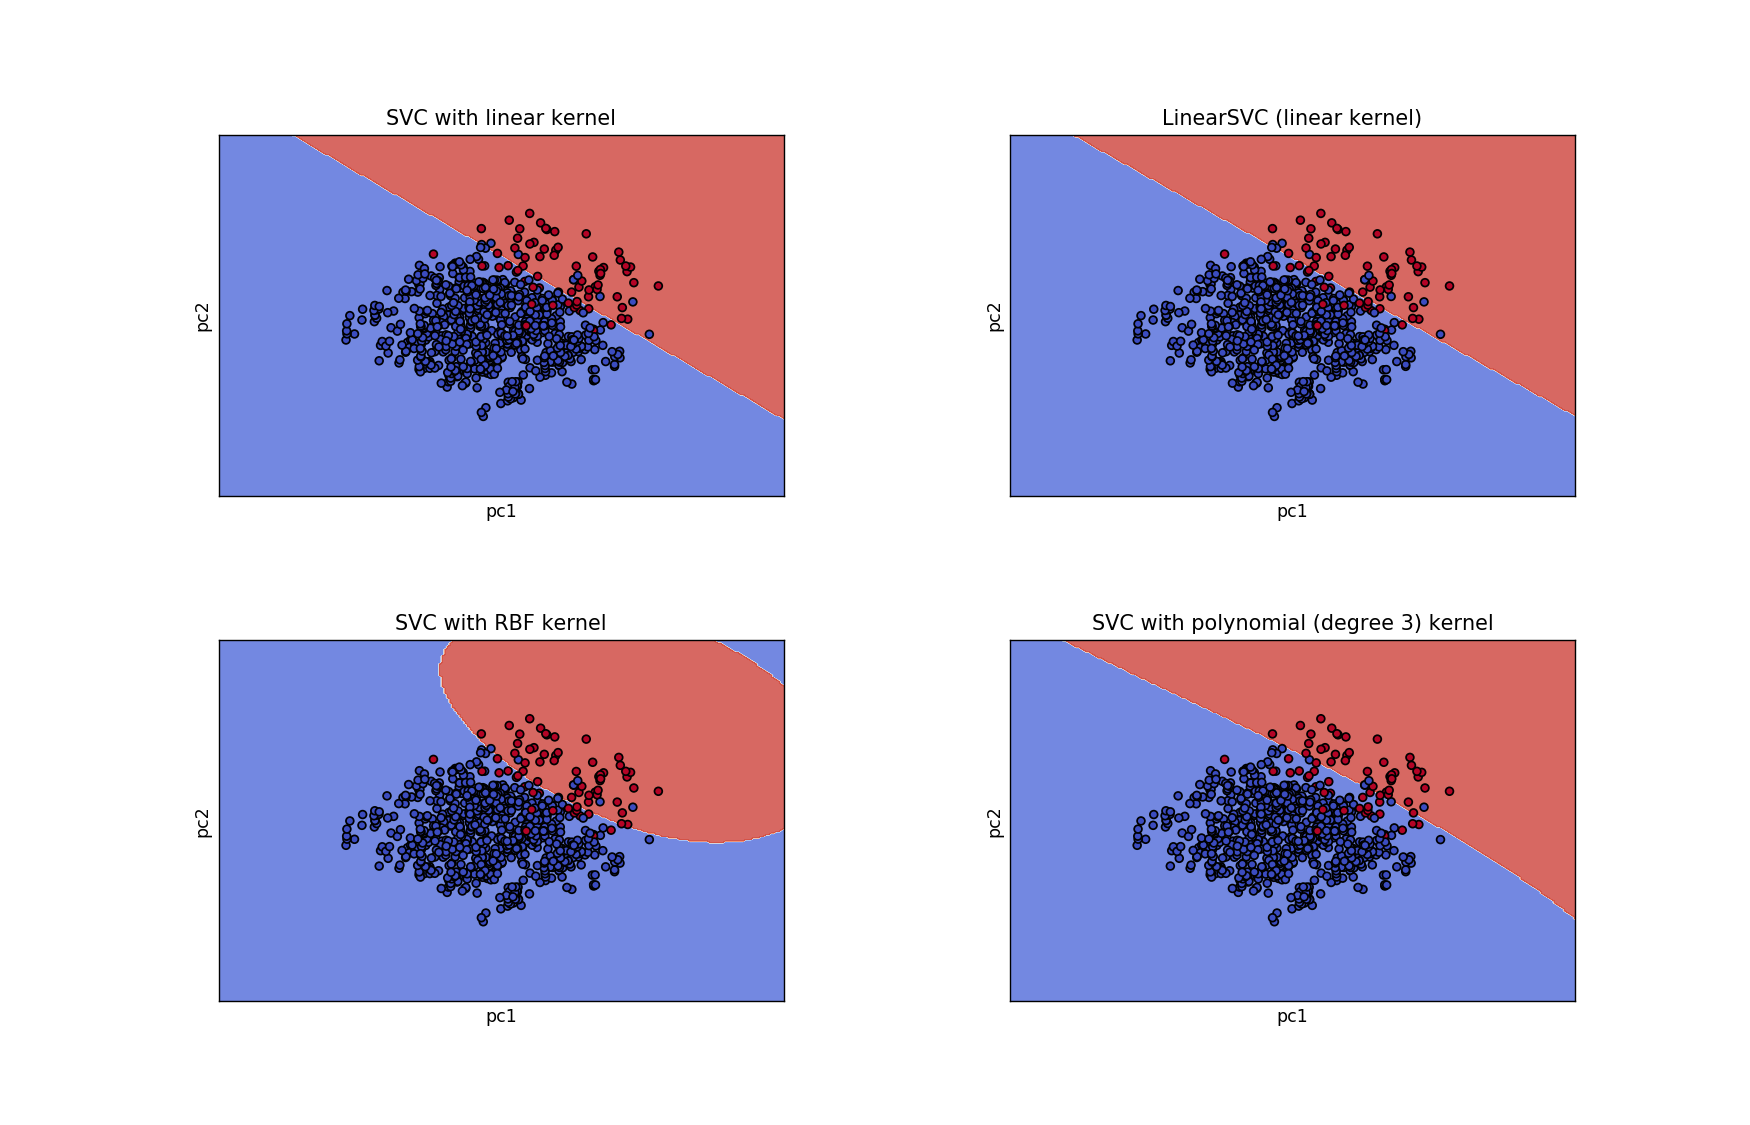

In [92]:
X=df.drop(["is_legendary"],axis=1)
y=df.filter(["is_legendary"]).values.ravel()
names=X.columns
show_C_effect_good(X.values,y,names,C=2)

Plolynomial features

In [93]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_poly_2=poly.fit_transform(X)
poly = PolynomialFeatures(interaction_only=True)
X_poly_inter=poly.fit_transform(X)

In [94]:
X_poly_2

array([[ 1.00000000e+00, -2.11924208e-01, -1.23191810e-01,
         4.49118697e-02,  2.61073267e-02,  1.51762221e-02],
       [ 1.00000000e+00, -1.10326181e-01, -9.30428166e-03,
         1.21718662e-02,  1.02650586e-03,  8.65696572e-05],
       [ 1.00000000e+00,  1.68464110e-01,  2.83450955e-01,
         2.83801563e-02,  4.77513127e-02,  8.03444436e-02],
       ...,
       [ 1.00000000e+00,  9.80511245e-02,  1.29613328e+00,
         9.61402303e-03,  1.27087326e-01,  1.67996148e+00],
       [ 1.00000000e+00,  8.11426668e-01,  6.03003439e-01,
         6.58413238e-01,  4.89293072e-01,  3.63613148e-01],
       [ 1.00000000e+00,  8.16048678e-01,  6.25464103e-01,
         6.65935445e-01,  5.10409154e-01,  3.91205344e-01]])

In [97]:
x_t,x_v,y_t,y_v = train_test_split(X_poly_2, y, test_size=0.2)
#x_t=X_train_selected
#x_v=X_test_selected
#y_t=Y_train
#y_v=Y_test

particions = [0.5, 0.7, 0.8]

for part in particions:
    #x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)
    problr = logireg.predict_proba(x_v)
    print ("Correct classification Logistic        ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Creem el svm
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    probsvc = svc.predict_proba(x_v)
    print ("Correct classification SVM             ", part, "% of the data: ", svc.score(x_v, y_v))
    
    #Creem el svm lineal
    svcl = svm.SVC(C=10.0, kernel='linear', gamma=0.9, probability=True)

    # l'entrenem 
    svcl.fit(x_t, y_t)
    probsvcl = svcl.predict_proba(x_v)
    print ("Correct classification SVML            ", part, "% of the data: ", svcl.score(x_v, y_v))
    
    #Creem el svm poly deg=3
    svcp = svm.SVC(C=10.0, kernel='poly', gamma=0.9, probability=True)

    # l'entrenem 
    svcp.fit(x_t, y_t)
    probsvcp = svcp.predict_proba(x_v)
    print ("Correct classification SVMP deg3       ", part, "% of the data: ", svcp.score(x_v, y_v))
    
    #Creem el svm poly deg=2
    svcp2 = svm.SVC(C=10.0, kernel='poly', degree=2, gamma=0.9, probability=True)

    # l'entrenem 
    svcp2.fit(x_t, y_t)
    probsvcp2 = svcp2.predict_proba(x_v)
    print ("Correct classification SVMP deg2       ", part, "% of the data: ", svcp2.score(x_v, y_v))
    
   
    #Creem el svm sigmoid
    svcs= svm.SVC(C=10.0, kernel='sigmoid', gamma=0.9, probability=True)

    # l'entrenem 
    svcs.fit(x_t, y_t)
    probsvcs = svcs.predict_proba(x_v)
    print ("Correct classification SVMS            ", part, "% of the data: ", svcs.score(x_v, y_v))
    
    #####
    
    #random forests gini

    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(x_t, y_t)
    probclf = clf.predict_proba(x_v)
    print ("Correct classification RFC             ", part, "% of the data: ", clf.score(x_v, y_v))
    
    #random forests entropy with n_e=1000 and md=5

    clfe = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0,criterion="entropy")
    clfe.fit(x_t, y_t)
    probclfe = clfe.predict_proba(x_v)
    print ("Correct classification RFC etpy        ", part, "% of the data: ", clfe.score(x_v, y_v))

    #####
    
    #KNN ball_tree
    
    KNNbt = KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree")
    KNNbt.fit(x_t, y_t)
    probKNNbt = KNNbt.predict_proba(x_v)
    print ("Correct classification KNN BT          ", part, "% of the data: ", KNNbt.score(x_v, y_v))
    
    #KNN kd_tree
    
    KNNkd = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree")
    KNNkd.fit(x_t, y_t)
    probKNNkd = KNNkd.predict_proba(x_v)
    print ("Correct classification KNN KD          ", part, "% of the data: ", KNNkd.score(x_v, y_v))
    
    #KNN brute
    
    KNNbrt = KNeighborsClassifier(n_neighbors=3,algorithm="brute")
    KNNbrt.fit(x_t, y_t)
    probKNNbrt = KNNbrt.predict_proba(x_v)
    print ("Correct classification KNN BRT         ", part, "% of the data: ", KNNbrt.score(x_v, y_v))
    
    #####
    
    #KNN ball_tree weights = distance
    
    KNNbtwd = KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree",weights="distance")
    KNNbtwd.fit(x_t, y_t)
    probKNNbtwd = KNNbtwd.predict_proba(x_v)
    print ("Correct classification KNN BT wd=d     ", part, "% of the data: ", KNNbtwd.score(x_v, y_v))
    
    #KNN kd_tree weights = distance
    
    KNNkdwd = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree",weights="distance")
    KNNkdwd.fit(x_t, y_t)
    probKNNkdwd = KNNkdwd.predict_proba(x_v)
    print ("Correct classification KNN KD wd=d     ", part, "% of the data: ", KNNkdwd.score(x_v, y_v))
    
    #KNN brute weights = distance
    
    KNNbrtwd = KNeighborsClassifier(n_neighbors=3,algorithm="brute",weights="distance")
    KNNbrtwd.fit(x_t, y_t)
    probKNNbrtwd = KNNbrtwd.predict_proba(x_v)
    print ("Correct classification KNN BRT wd=d    ", part, "% of the data: ", KNNbrtwd.score(x_v, y_v))    
    
    print("\n")

Correct classification Logistic         0.5 % of the data:  0.9751552795031055
Correct classification SVM              0.5 % of the data:  0.9751552795031055
Correct classification SVML             0.5 % of the data:  0.9751552795031055
Correct classification SVMP deg3        0.5 % of the data:  0.9751552795031055
Correct classification SVMP deg2        0.5 % of the data:  0.9751552795031055
Correct classification SVMS             0.5 % of the data:  0.9565217391304348
Correct classification RFC              0.5 % of the data:  0.9503105590062112
Correct classification RFC etpy         0.5 % of the data:  0.9565217391304348
Correct classification KNN BT           0.5 % of the data:  0.9875776397515528
Correct classification KNN KD           0.5 % of the data:  0.9875776397515528
Correct classification KNN BRT          0.5 % of the data:  0.9875776397515528
Correct classification KNN BT wd=d      0.5 % of the data:  0.9875776397515528
Correct classification KNN KD wd=d      0.5 % of the

In [98]:
x_t,x_v,t_t,t_v = train_test_split(X_poly_inter, y, test_size=0.2)
particions = [0.5, 0.7, 0.8]

for part in particions:
    #x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)

    # l'entrenem
    logireg.fit(x_t, y_t)
    problr = logireg.predict_proba(x_v)
    print ("Correct classification Logistic        ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Creem el svm
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    probsvc = svc.predict_proba(x_v)
    print ("Correct classification SVM             ", part, "% of the data: ", svc.score(x_v, y_v))
    
    #Creem el svm lineal
    svcl = svm.SVC(C=10.0, kernel='linear', gamma=0.9, probability=True)

    # l'entrenem 
    svcl.fit(x_t, y_t)
    probsvcl = svcl.predict_proba(x_v)
    print ("Correct classification SVML            ", part, "% of the data: ", svcl.score(x_v, y_v))
    
    #Creem el svm poly deg=3
    svcp = svm.SVC(C=10.0, kernel='poly', gamma=0.9, probability=True)

    # l'entrenem 
    svcp.fit(x_t, y_t)
    probsvcp = svcp.predict_proba(x_v)
    print ("Correct classification SVMP deg3       ", part, "% of the data: ", svcp.score(x_v, y_v))
    
    #Creem el svm poly deg=2
    svcp2 = svm.SVC(C=10.0, kernel='poly', degree=2, gamma=0.9, probability=True)

    # l'entrenem 
    svcp2.fit(x_t, y_t)
    probsvcp2 = svcp2.predict_proba(x_v)
    print ("Correct classification SVMP deg2       ", part, "% of the data: ", svcp2.score(x_v, y_v))
    
   
    #Creem el svm sigmoid
    svcs= svm.SVC(C=10.0, kernel='sigmoid', gamma=0.9, probability=True)

    # l'entrenem 
    svcs.fit(x_t, y_t)
    probsvcs = svcs.predict_proba(x_v)
    print ("Correct classification SVMS            ", part, "% of the data: ", svcs.score(x_v, y_v))
    
    #####
    
    #random forests gini

    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(x_t, y_t)
    probclf = clf.predict_proba(x_v)
    print ("Correct classification RFC             ", part, "% of the data: ", clf.score(x_v, y_v))
    
    #random forests entropy with n_e=1000 and md=5

    clfe = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0,criterion="entropy")
    clfe.fit(x_t, y_t)
    probclfe = clfe.predict_proba(x_v)
    print ("Correct classification RFC etpy        ", part, "% of the data: ", clfe.score(x_v, y_v))

    #####
    
    #KNN ball_tree
    
    KNNbt = KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree")
    KNNbt.fit(x_t, y_t)
    probKNNbt = KNNbt.predict_proba(x_v)
    print ("Correct classification KNN BT          ", part, "% of the data: ", KNNbt.score(x_v, y_v))
    
    #KNN kd_tree
    
    KNNkd = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree")
    KNNkd.fit(x_t, y_t)
    probKNNkd = KNNkd.predict_proba(x_v)
    print ("Correct classification KNN KD          ", part, "% of the data: ", KNNkd.score(x_v, y_v))
    
    #KNN brute
    
    KNNbrt = KNeighborsClassifier(n_neighbors=3,algorithm="brute")
    KNNbrt.fit(x_t, y_t)
    probKNNbrt = KNNbrt.predict_proba(x_v)
    print ("Correct classification KNN BRT         ", part, "% of the data: ", KNNbrt.score(x_v, y_v))
    
    #####
    
    #KNN ball_tree weights = distance
    
    KNNbtwd = KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree",weights="distance")
    KNNbtwd.fit(x_t, y_t)
    probKNNbtwd = KNNbtwd.predict_proba(x_v)
    print ("Correct classification KNN BT wd=d     ", part, "% of the data: ", KNNbtwd.score(x_v, y_v))
    
    #KNN kd_tree weights = distance
    
    KNNkdwd = KNeighborsClassifier(n_neighbors=3,algorithm="kd_tree",weights="distance")
    KNNkdwd.fit(x_t, y_t)
    probKNNkdwd = KNNkdwd.predict_proba(x_v)
    print ("Correct classification KNN KD wd=d     ", part, "% of the data: ", KNNkdwd.score(x_v, y_v))
    
    #KNN brute weights = distance
    
    KNNbrtwd = KNeighborsClassifier(n_neighbors=3,algorithm="brute",weights="distance")
    KNNbrtwd.fit(x_t, y_t)
    probKNNbrtwd = KNNbrtwd.predict_proba(x_v)
    print ("Correct classification KNN BRT wd=d    ", part, "% of the data: ", KNNbrtwd.score(x_v, y_v))    
    
    print("\n")

Correct classification Logistic         0.5 % of the data:  0.9254658385093167
Correct classification SVM              0.5 % of the data:  0.9254658385093167
Correct classification SVML             0.5 % of the data:  0.9254658385093167
Correct classification SVMP deg3        0.5 % of the data:  0.9254658385093167
Correct classification SVMP deg2        0.5 % of the data:  0.9254658385093167
Correct classification SVMS             0.5 % of the data:  0.8757763975155279
Correct classification RFC              0.5 % of the data:  0.9254658385093167
Correct classification RFC etpy         0.5 % of the data:  0.9254658385093167
Correct classification KNN BT           0.5 % of the data:  0.9254658385093167
Correct classification KNN KD           0.5 % of the data:  0.9254658385093167
Correct classification KNN BRT          0.5 % of the data:  0.9254658385093167
Correct classification KNN BT wd=d      0.5 % of the data:  0.9006211180124224
Correct classification KNN KD wd=d      0.5 % of the

In [99]:
from sklearn.model_selection import LeaveOneOut

In [116]:
y = dataset.filter(['is_legendary'])
X =dataset.drop(['is_legendary'],axis=1)
X=(X-X.mean())/X.std()
X=X.values
y=y.values
loo = LeaveOneOut()
loo.get_n_splits(X)
accuracy=0
for train_index, test_index in loo.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001)
    logireg.fit(X_train, y_train)
    problr = logireg.predict_proba(X_test)
    accuracy+=logireg.score(X_test, y_test)
    #print(X_train, X_test, y_train, y_test)
accuracy/len(y)

0.9837702871410736

In [111]:
y.values[0]

array([0], dtype=int64)

0.9254658385093167